# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
model_name = "qwen2.5" # 'deepseek-coder-v2'
CONFIG = {
    'model': model_name,   
}

file_db = "~/Downloads/chinook.sqlite"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [3]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    if err_msg and "an unknown error was encountered while running the model" in err_msg:
        # re-run
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            return sql, df, fig, err_msg
        
    # re-try
    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [4]:
vn = MyVanna(config=CONFIG)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [9]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [10]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [11]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [12]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [13]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


In [14]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]

### Loop over questions

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 2:  Can you list all tables in the SQLite database catalog?


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE sqlite_stat1(tbl,idx,stat)\n\nCREATE TABLE sqlite_sequence(name,seq)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "genres"\r\n(\r\n    GenreId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,

SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


[( DATA )]
queried data frame


,name
0,albums
1,artists
2,customers
3,employees
4,genres
5,invoice_items
6,invoices
7,media_types
8,playlist_track
9,playlists



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Can you list all tables in the SQLite database catalog?'\n\nThe DataFrame was produced using this query: SELECT name FROM sqlite_master WHERE type='table' ORDER BY name\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n name    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created_at': '2024-10-12T17:59:42.911473721Z', 'message': {'role': 'assistant', 'conte

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df.iloc[0]['name'],
        title="Only Table in Database"
    )
else:
    fig = px.bar(df, x=df.index, y='name', title="Tables in Database")

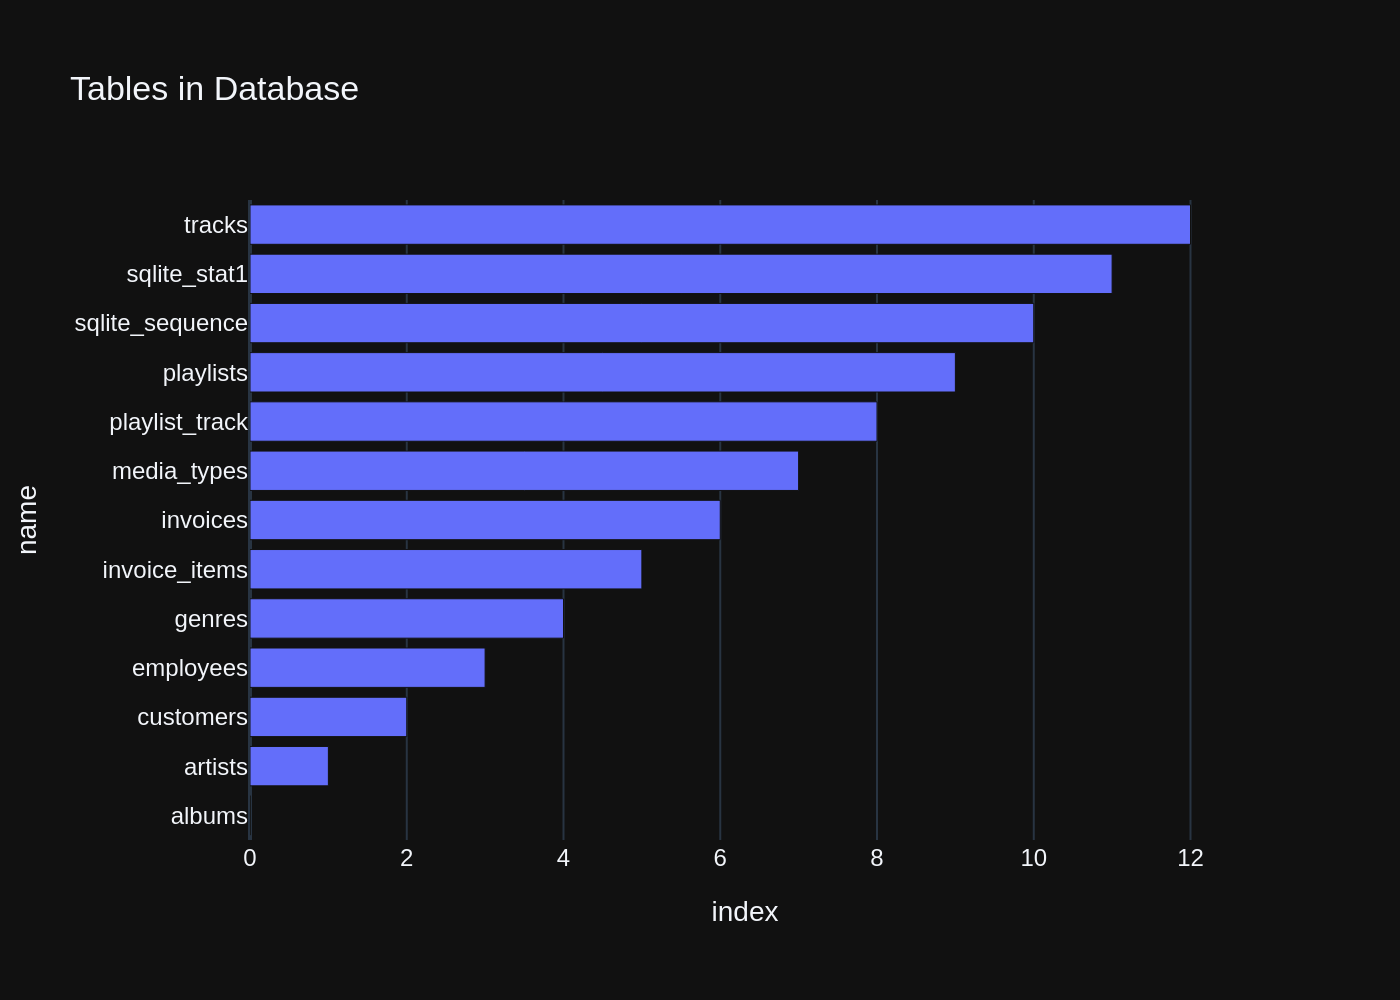

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 3:  which table stores customer's orders


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n 

SELECT name FROM sqlite_master WHERE type='table' AND name='invoices'


[( DATA )]
queried data frame


,name
0,invoices



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'which table stores customer's orders'\n\nThe DataFrame was produced using this query: SELECT name FROM sqlite_master WHERE type='table' AND name='invoices'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n name    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created_at': '2024-10-12T18:00:58.879356863Z', 'message': {'role': 'assistant', 'content': '```pyth

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df.iloc[0]['name'],
        title="Customer Orders Table"
    )
else:
    fig = px.bar(
        df,
        x=df.index,
        y='name',
        title="Tables Related to Customer Orders"
    )

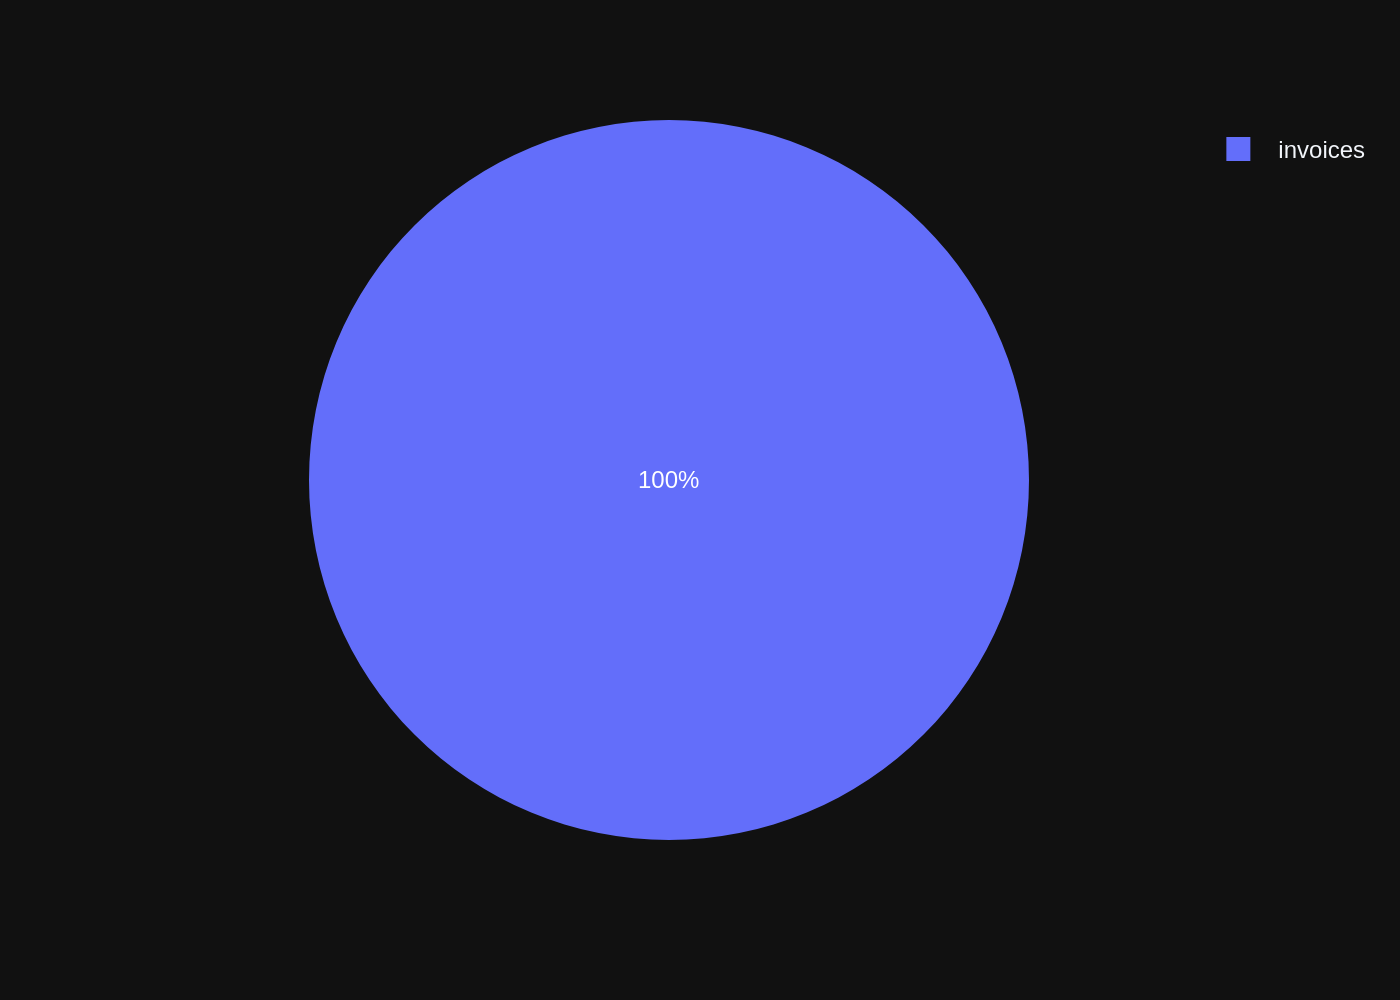

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 4:  How many customers are there


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName N

SELECT COUNT(*) FROM customers


[( DATA )]
queried data frame


,COUNT(*)
0,59



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'How many customers are there'\n\nThe DataFrame was produced using this query: SELECT COUNT(*) FROM customers\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n COUNT(*)    int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created_at': '2024-10-12T18:02:02.116227659Z', 'message': {'role': 'assistant', 'content': '```python\nimport plotly.express as px\n\nfig = px.

import plotly.express as px

fig = px.indicator(
    value=df['COUNT(*)'].values[0],
    title="Number of Customers"
)

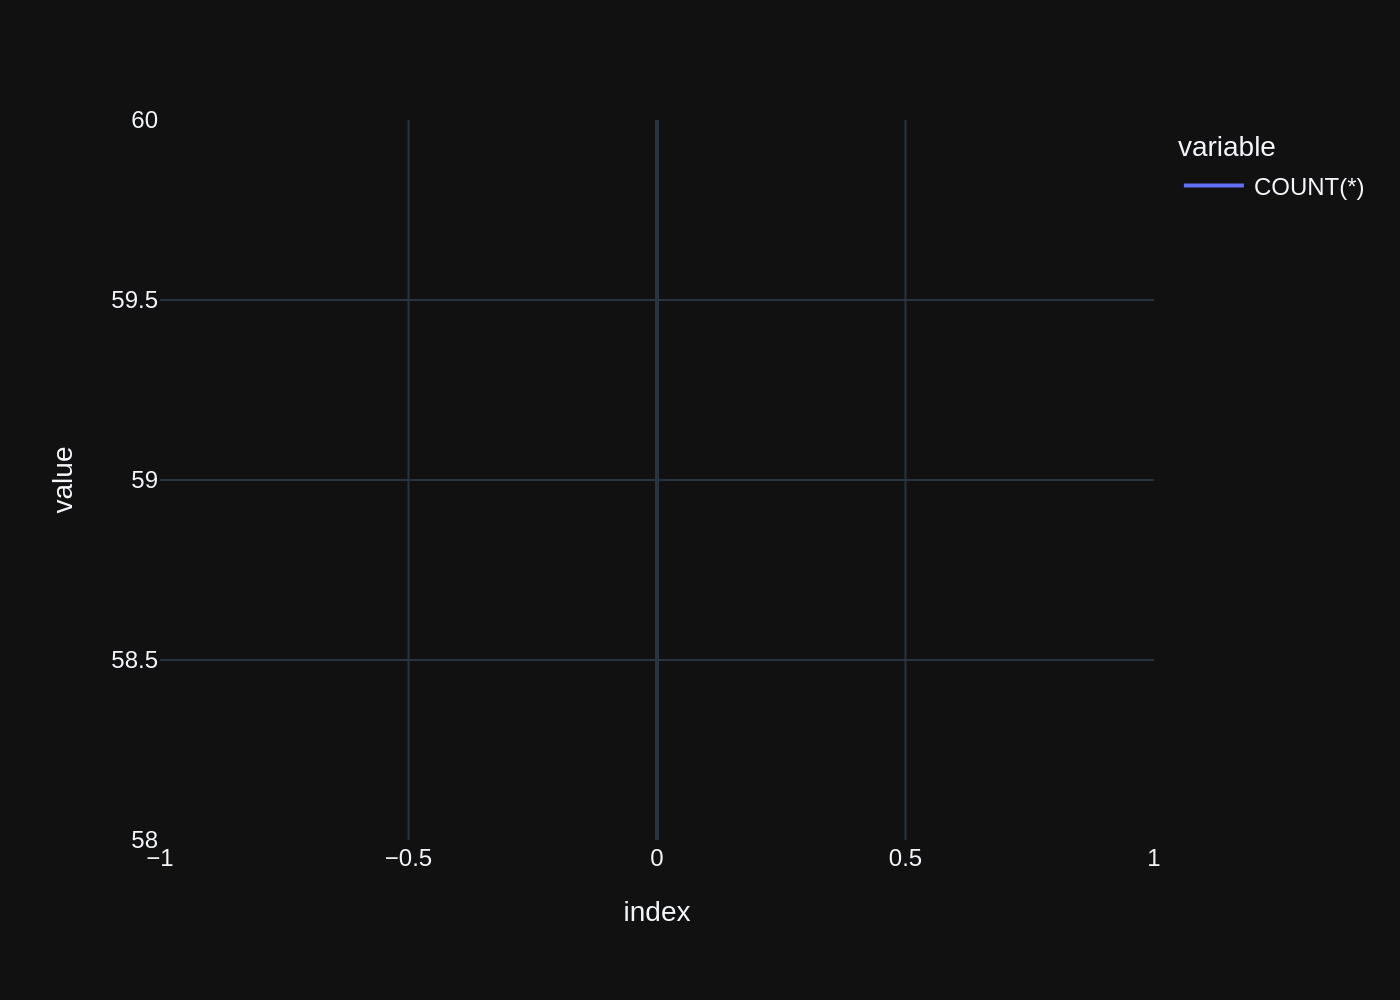

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 5:  what are the top 5 countries that customers come from?


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCH

SELECT Country, COUNT(*) AS CustomerCount FROM customers GROUP BY Country ORDER BY CustomerCount DESC LIMIT 5


[( DATA )]
queried data frame


,Country,CustomerCount
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'what are the top 5 countries that customers come from?'\n\nThe DataFrame was produced using this query: SELECT Country, COUNT(*) AS CustomerCount FROM customers GROUP BY Country ORDER BY CustomerCount DESC LIMIT 5\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Country          object\nCustomerCount     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(value=df.iloc[0]['CustomerCount'], title='Top Country by Customer Count')
else:
    fig = px.bar(df, x='Country', y='CustomerCount', title='Top 5 Countries by Customer Count')

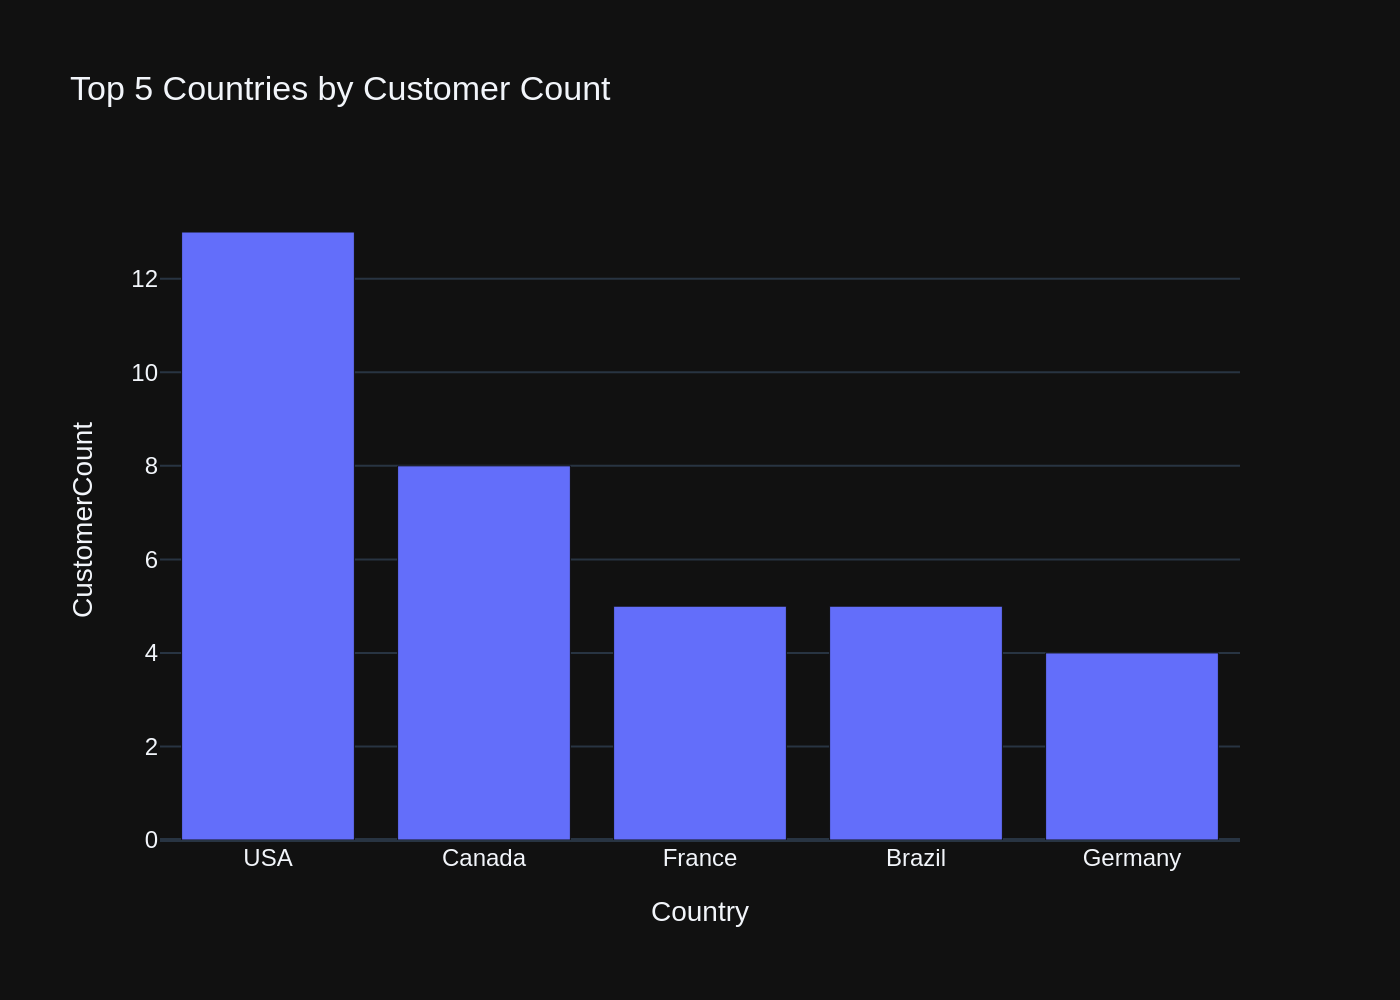

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 6:  List all albums and their corresponding artist names  


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON "albums" (ArtistId)\n\nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Title NVARCHAR(160)  NOT NULL,\r\n    ArtistId INTEGER  NOT NULL,\r\n    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(1

SELECT albums.Title, artists.Name FROM albums INNER JOIN artists ON albums.ArtistId = artists.ArtistId


[( DATA )]
queried data frame


,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
...,...,...
342,Respighi:Pines of Rome,Eugene Ormandy
343,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
344,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
345,Mozart: Chamber Music,Nash Ensemble



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all albums and their corresponding artist names  '\n\nThe DataFrame was produced using this query: SELECT albums.Title, artists.Name FROM albums INNER JOIN artists ON albums.ArtistId = artists.ArtistId\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Title    object\nName     object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created_at': '2024-10-12T18:04

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['Title'].iloc[0],
        title='Album and Artist',
        color_discrete_map={'Indicator': 'indianred'}
    )
else:
    fig = px.scatter(
        df, 
        x='Title', 
        y='Name', 
        text=df.index,
        labels={'index':'Index'},
        title='Albums and Artists'
    )

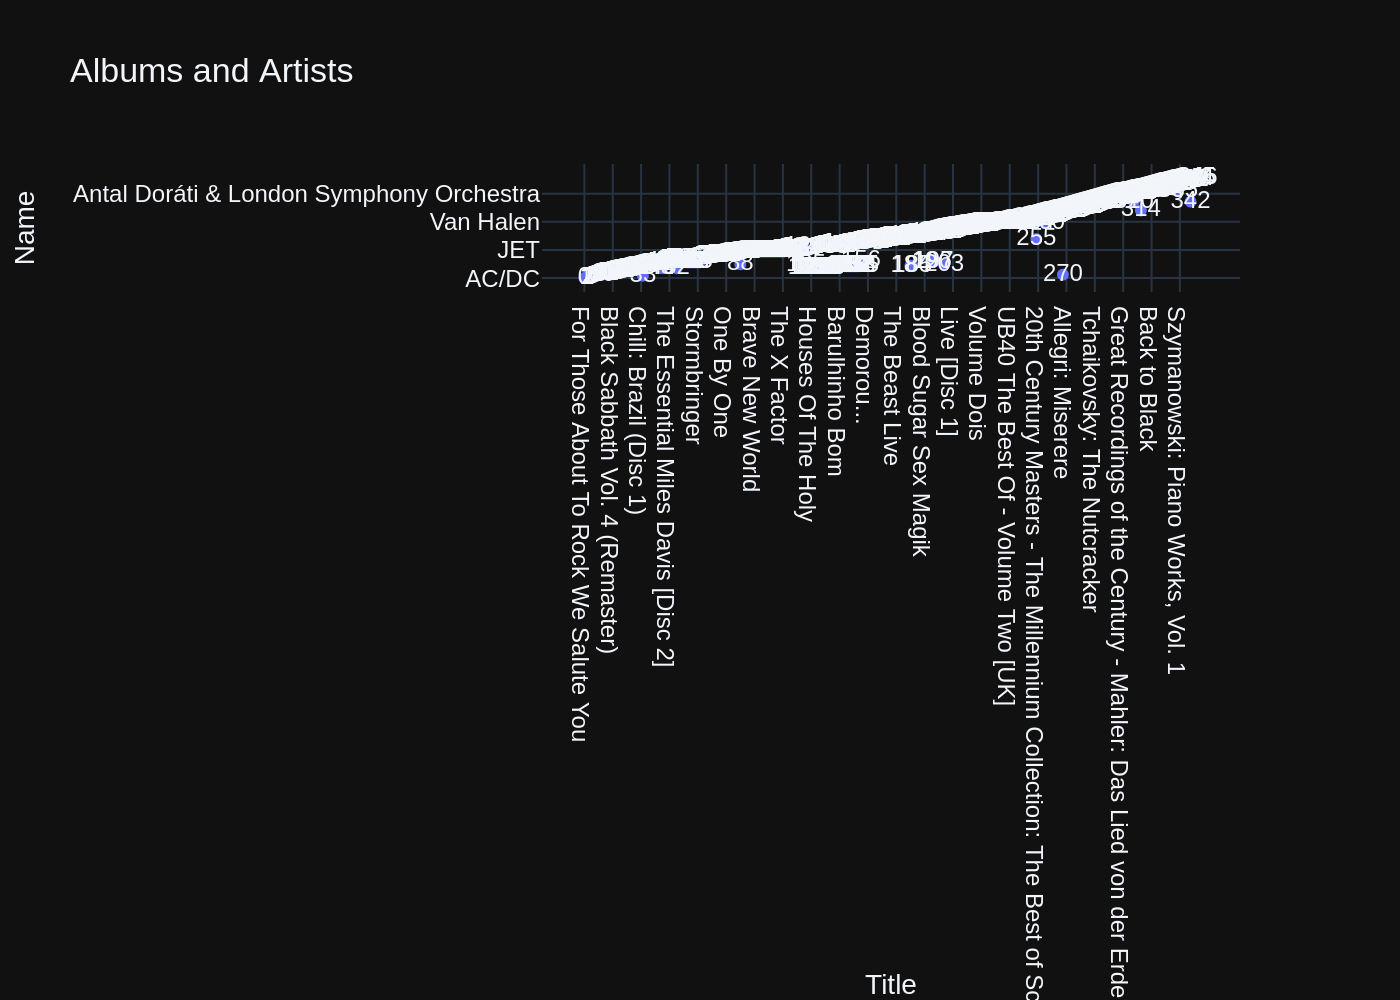

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 7:  Find all tracks with a name containing "What" (case-insensitive) 


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DEL

SELECT Name FROM tracks WHERE LOWER(Name) LIKE '%what%'


[( DATA )]
queried data frame


,Name
0,What It Takes
1,What You Are
2,Do what cha wanna
3,What is and Should Never Be
4,So What
5,What A Day
6,What If I Do?
7,What Now My Love
8,Whatsername
9,"Whatever It Is, I Just Can't Stop"



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find all tracks with a name containing \"What\" (case-insensitive) '\n\nThe DataFrame was produced using this query: SELECT Name FROM tracks WHERE LOWER(Name) LIKE '%what%'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Name    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created_at': '2024-10-12T18:05:36.393935034Z', 'message': {'role': 'assistant', 'c

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(value=df['Name'].values[0], title='Track Name')
else:
    fig = px.bar(x=df['Name'], y=[1]*len(df), title='Tracks with "What" in the name', labels={'y': ''})

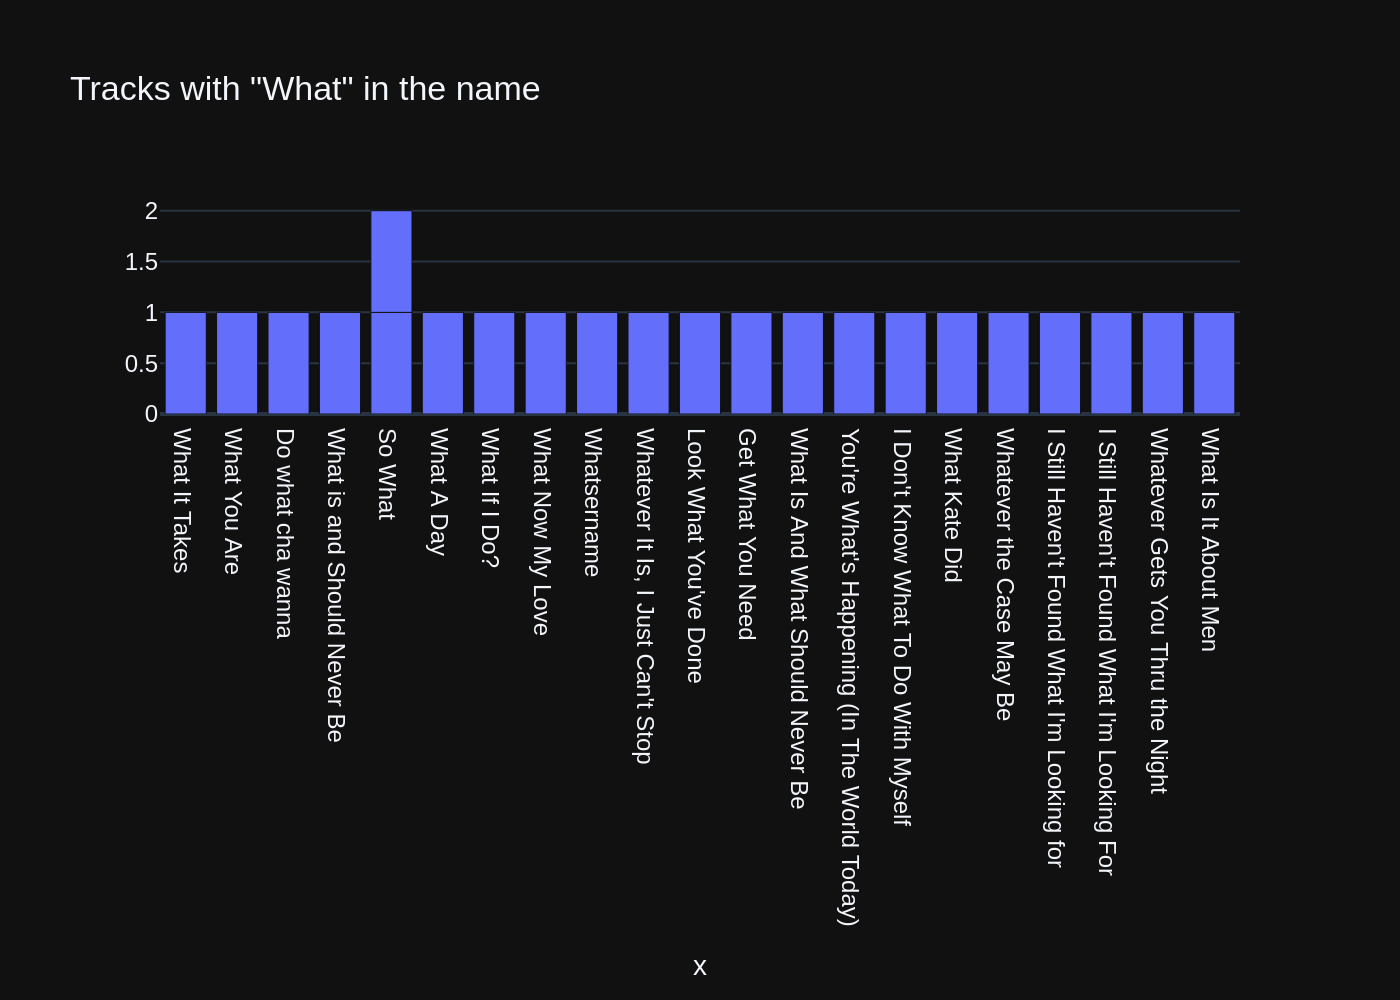

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 8:  Get the total number of invoices for each customer


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_

SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS InvoiceCount FROM customers c LEFT JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY InvoiceCount DESC


[( DATA )]
queried data frame


,CustomerId,FirstName,LastName,InvoiceCount
0,1,Luís,Gonçalves,7
1,2,Leonie,Köhler,7
2,3,François,Tremblay,7
3,4,Bjørn,Hansen,7
4,5,František,Wichterlová,7
5,6,Helena,Holý,7
6,7,Astrid,Gruber,7
7,8,Daan,Peeters,7
8,9,Kara,Nielsen,7
9,10,Eduardo,Martins,7



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Get the total number of invoices for each customer'\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS InvoiceCount FROM customers c LEFT JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY InvoiceCount DESC\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId       int64\nFirstName       object\nLastName        object\nInvoiceCount     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an In

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['InvoiceCount'].values[0],
        title=f"Total Invoices for Customer"
    )
else:
    fig = px.bar(
        df, 
        x='FirstName', 
        y='InvoiceCount', 
        title="Total Invoices per Customer",
        hover_data=['LastName']
    )

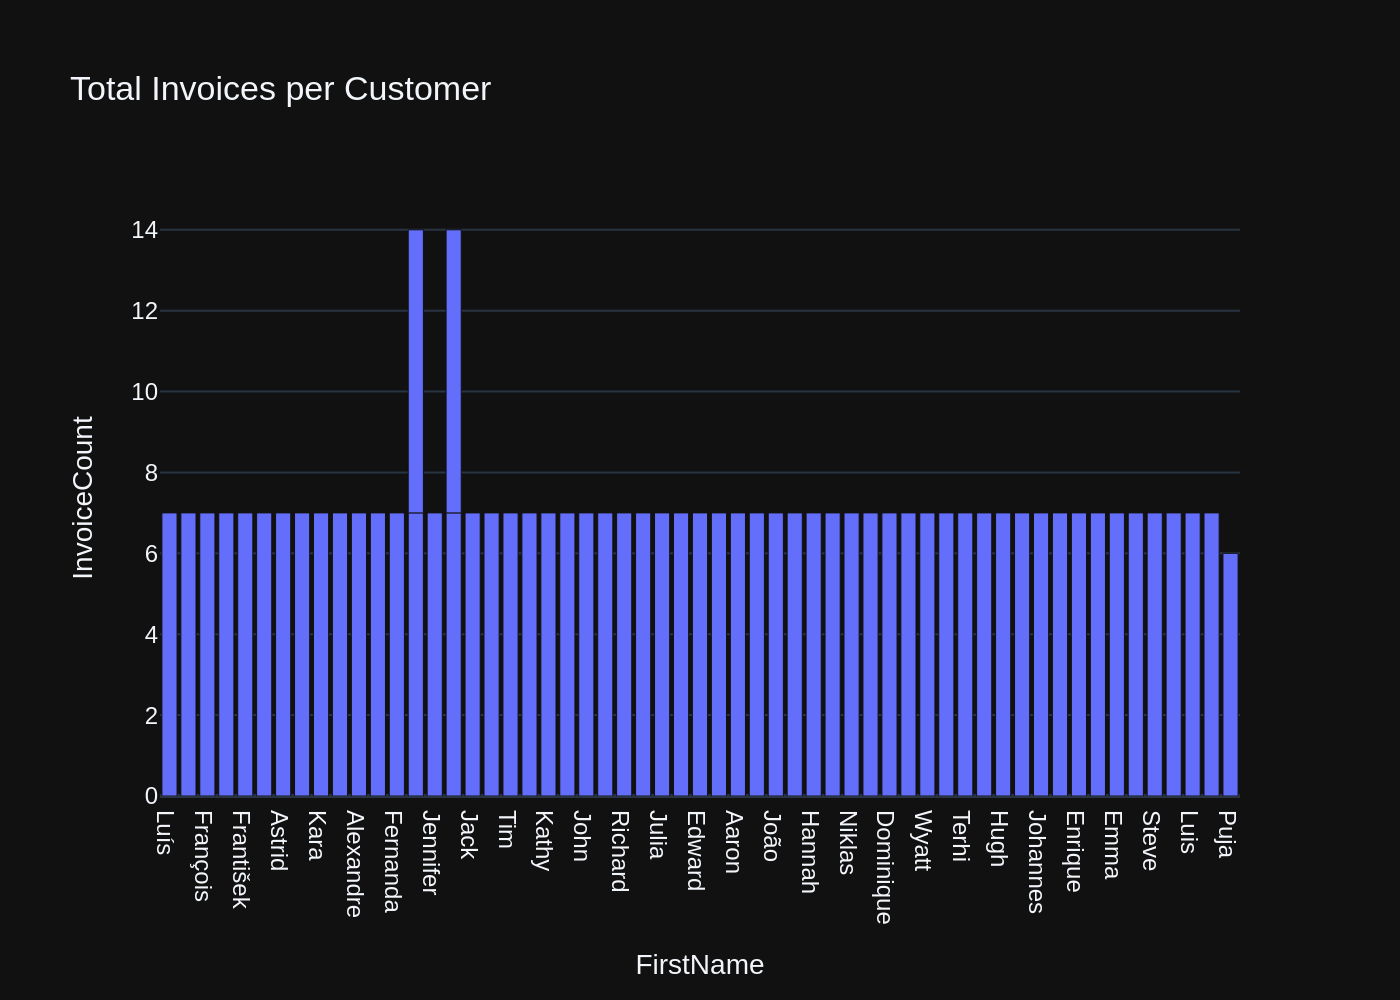

Number of requested results 10 is greater than number of elements in index 7, updating n_results = 7
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 9:  Find the total number of invoices per country


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\

SELECT BillingCountry, COUNT(*) AS InvoiceCount FROM invoices GROUP BY BillingCountry ORDER BY InvoiceCount DESC


[( DATA )]
queried data frame


,BillingCountry,InvoiceCount
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28
5,United Kingdom,21
6,Portugal,14
7,Czech Republic,14
8,India,13
9,Sweden,7



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the total number of invoices per country'\n\nThe DataFrame was produced using this query: SELECT BillingCountry, COUNT(*) AS InvoiceCount FROM invoices GROUP BY BillingCountry ORDER BY InvoiceCount DESC\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n BillingCountry    object\nInvoiceCount       int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created_at'

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df.iloc[0]['InvoiceCount'],
        title=f'Total Invoices per Country'
    )
else:
    fig = px.bar(
        df,
        x='BillingCountry',
        y='InvoiceCount',
        title='Total Invoices per Country'
    )

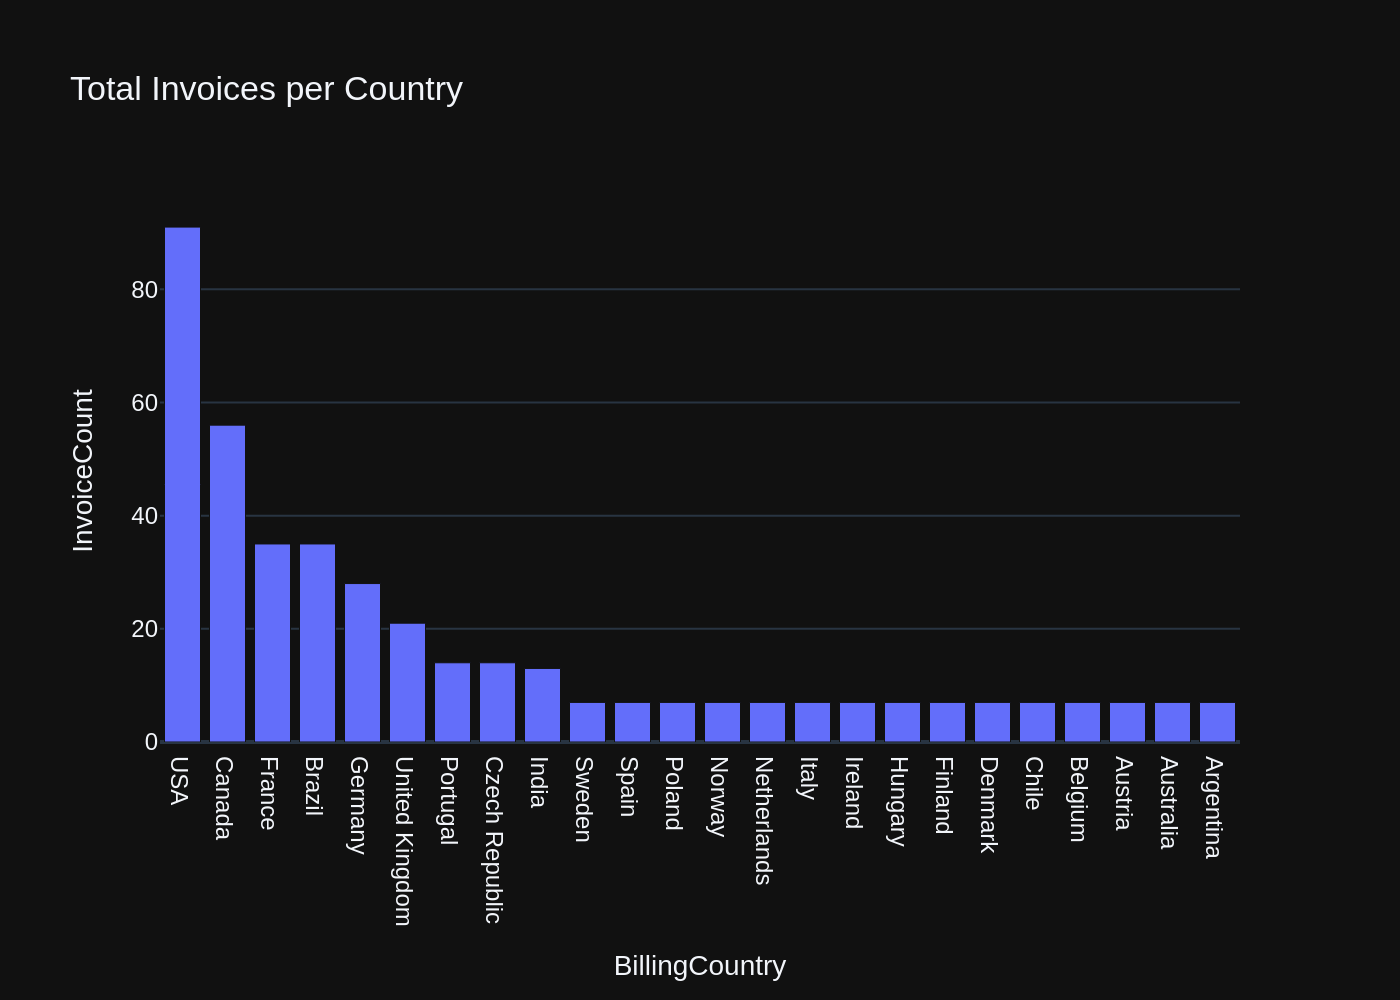

Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 10:  List all invoices with a total exceeding $10


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NU

SELECT InvoiceId, Total FROM invoices WHERE Total > 10


[( DATA )]
queried data frame


,InvoiceId,Total
0,5,13.86
1,12,13.86
2,19,13.86
3,26,13.86
4,33,13.86
...,...,...
59,383,13.86
60,390,13.86
61,397,13.86
62,404,25.86



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all invoices with a total exceeding $10'\n\nThe DataFrame was produced using this query: SELECT InvoiceId, Total FROM invoices WHERE Total > 10\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId      int64\nTotal        float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created_at': '2024-10-12T18:10:22.302049222Z', 'message': {'role': 'assistant'

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(values=df.Total.item())
else:
    fig = px.bar(df, x='InvoiceId', y='Total')

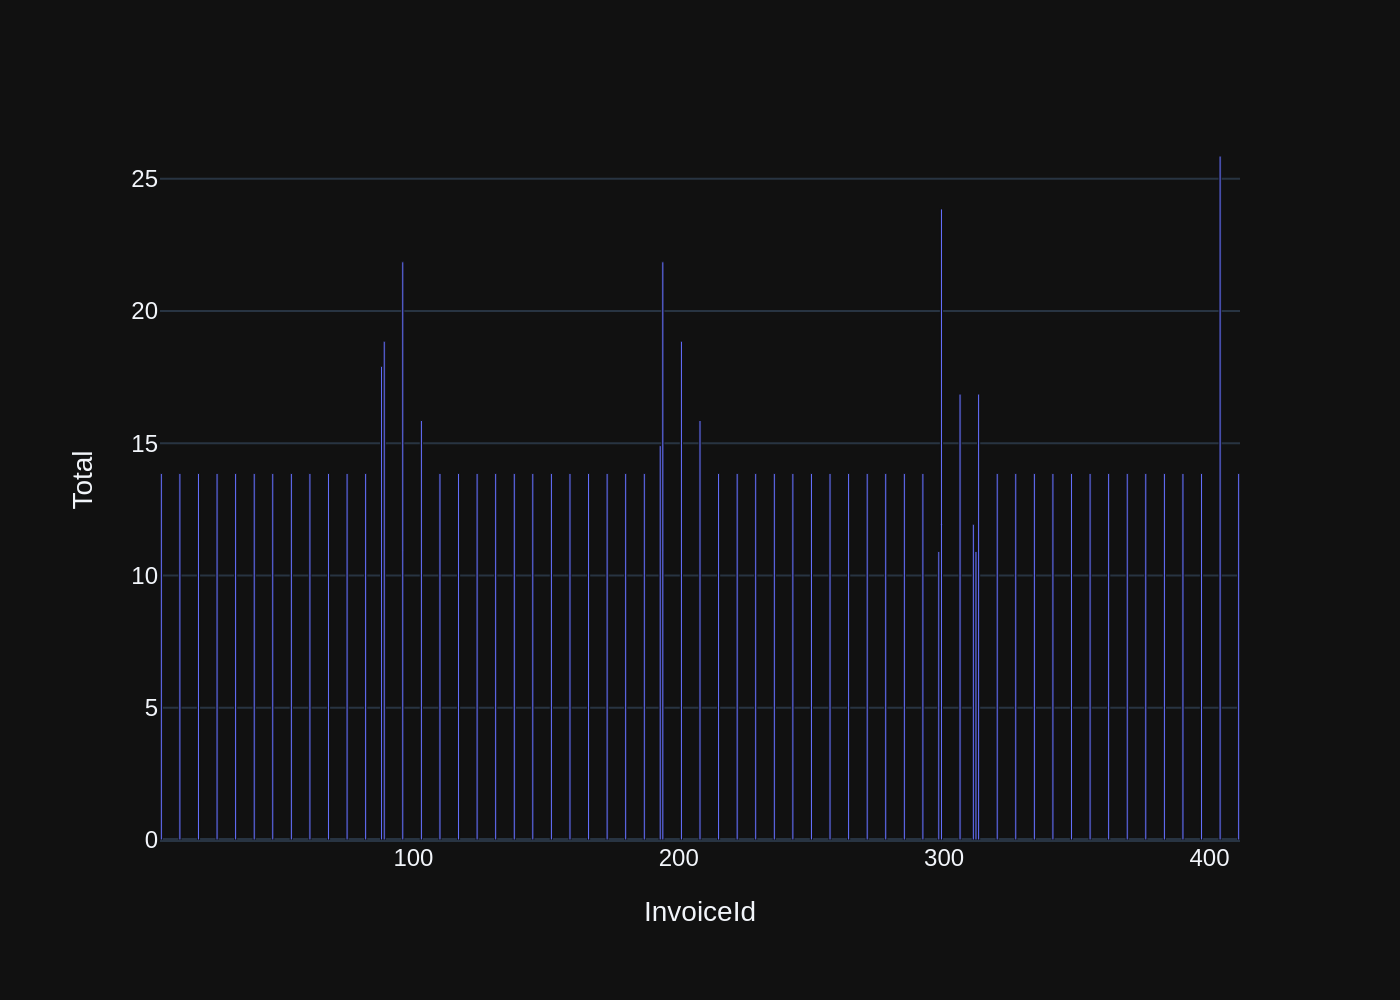

Number of requested results 10 is greater than number of elements in index 9, updating n_results = 9
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 11:  Find all invoices since 2010 and the total amount invoiced:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId

SELECT InvoiceDate, Total FROM invoices WHERE InvoiceDate >= '2010-01-01'


[( DATA )]
queried data frame


,InvoiceDate,Total
0,2010-01-08 00:00:00,1.98
1,2010-01-08 00:00:00,1.98
2,2010-01-09 00:00:00,3.96
3,2010-01-10 00:00:00,6.94
4,2010-01-13 00:00:00,17.91
...,...,...
324,2013-12-05 00:00:00,3.96
325,2013-12-06 00:00:00,5.94
326,2013-12-09 00:00:00,8.91
327,2013-12-14 00:00:00,13.86



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find all invoices since 2010 and the total amount invoiced:'\n\nThe DataFrame was produced using this query: SELECT InvoiceDate, Total FROM invoices WHERE InvoiceDate >= '2010-01-01'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceDate     object\nTotal          float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created_at': '2024-10-12T18:12:12.857104

import plotly.express as px

fig = px.indicator(
    if len(df) == 1:
        title="Total Amount Invoiced Since 2010",
        value=df['Total'].values[0],
        mode="number",
    else:
        title="Invoices and Total Amount Invoiced Since 2010",
        data_frame=df,
        x='InvoiceDate',
        y='Total',
        trendline="ols"
)

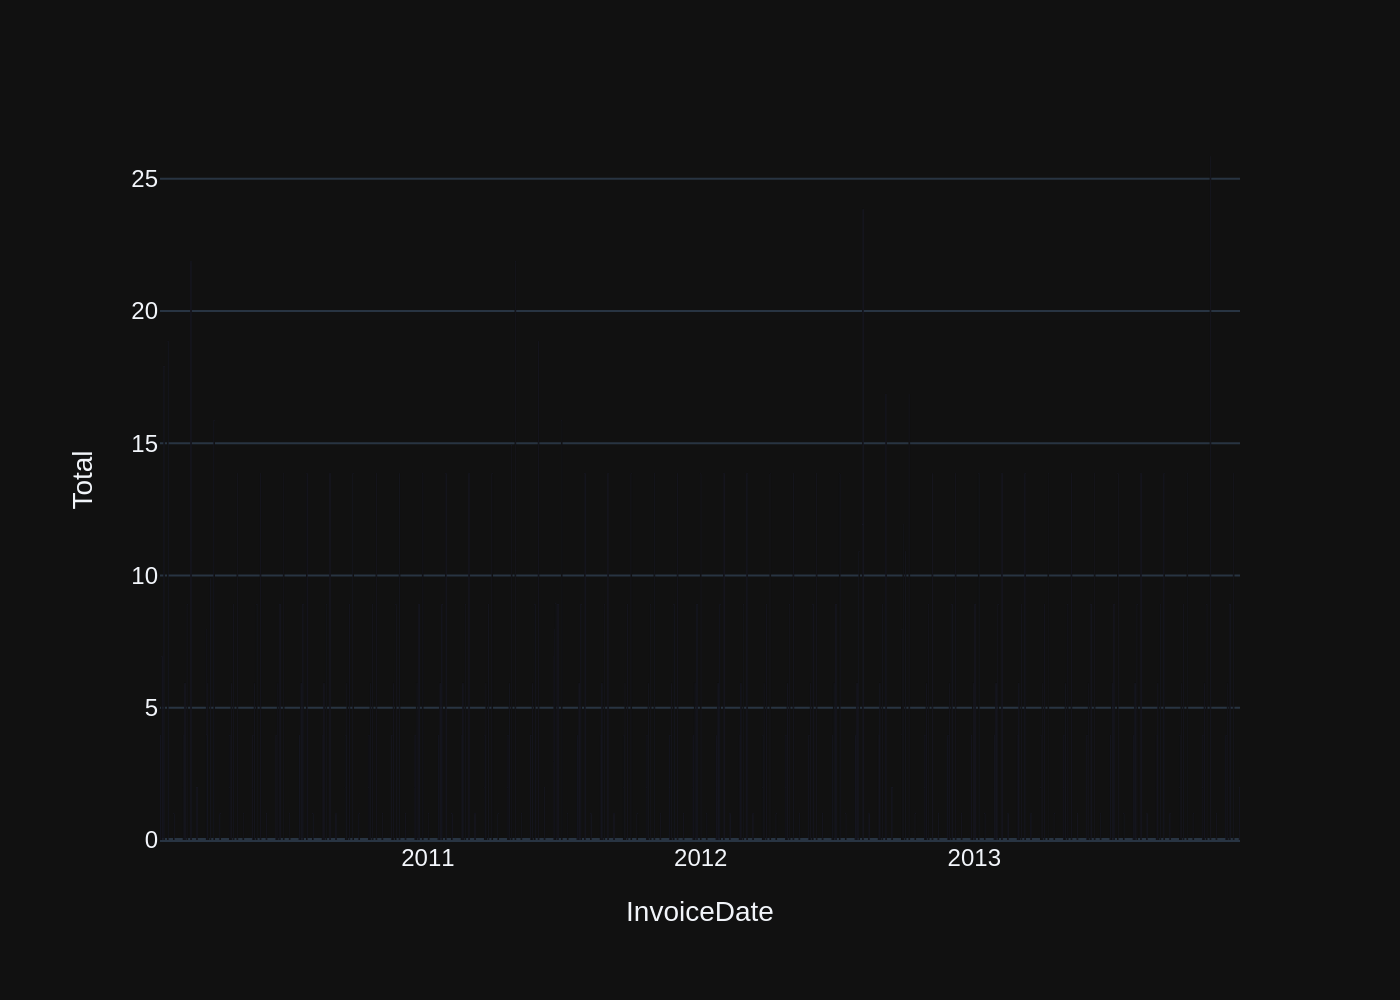

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 12:  List all employees and their reporting manager's name (if any):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_EmployeeReportsTo ON "employees" (ReportsTo)\n\nCREATE TABLE "employees"\r\n(\r\n    EmployeeId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    FirstName NVARCHAR(20)  NOT NULL,\r\n    Title NVARCHAR(30),\r\n    ReportsTo INTEGER,\r\n    BirthDate DATETIME,\r\n    HireDate DATETIME,\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60),\r\n    FOREIGN KEY (ReportsTo) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE 

SELECT e1.FirstName, e1.LastName, e2.FirstName AS ManagerFirstName, e2.LastName AS ManagerLastName 
FROM employees e1 
LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId


[( DATA )]
queried data frame


,FirstName,LastName,ManagerFirstName,ManagerLastName
0,Andrew,Adams,None,None
1,Nancy,Edwards,Andrew,Adams
2,Jane,Peacock,Nancy,Edwards
3,Margaret,Park,Nancy,Edwards
4,Steve,Johnson,Nancy,Edwards
5,Michael,Mitchell,Andrew,Adams
6,Robert,King,Michael,Mitchell
7,Laura,Callahan,Michael,Mitchell



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all employees and their reporting manager's name (if any):'\n\nThe DataFrame was produced using this query: SELECT e1.FirstName, e1.LastName, e2.FirstName AS ManagerFirstName, e2.LastName AS ManagerLastName \nFROM employees e1 \nLEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n FirstName           object\nLastName            object\nManagerFirstName    object\nManagerLastName     object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond wi

import plotly.express as px

if df.shape[0] == 1:
    fig = px.indicator(value=df['ManagerFirstName'][df['ManagerFirstName'].notna()].iloc[0] if df['ManagerFirstName'].notna().any() else 0,
                       title='Employee and Reporting Manager',
                       color_discrete_map={'#008cba'})
else:
    fig = px.scatter(df, x='FirstName', y='ManagerFirstName', text='LastName', 
                     labels={'FirstName': 'Employee', 'ManagerFirstName': 'Reporting Manager'},
                     title='Employees and Their Reporting Managers')
fig.update_traces(textposition='top center')

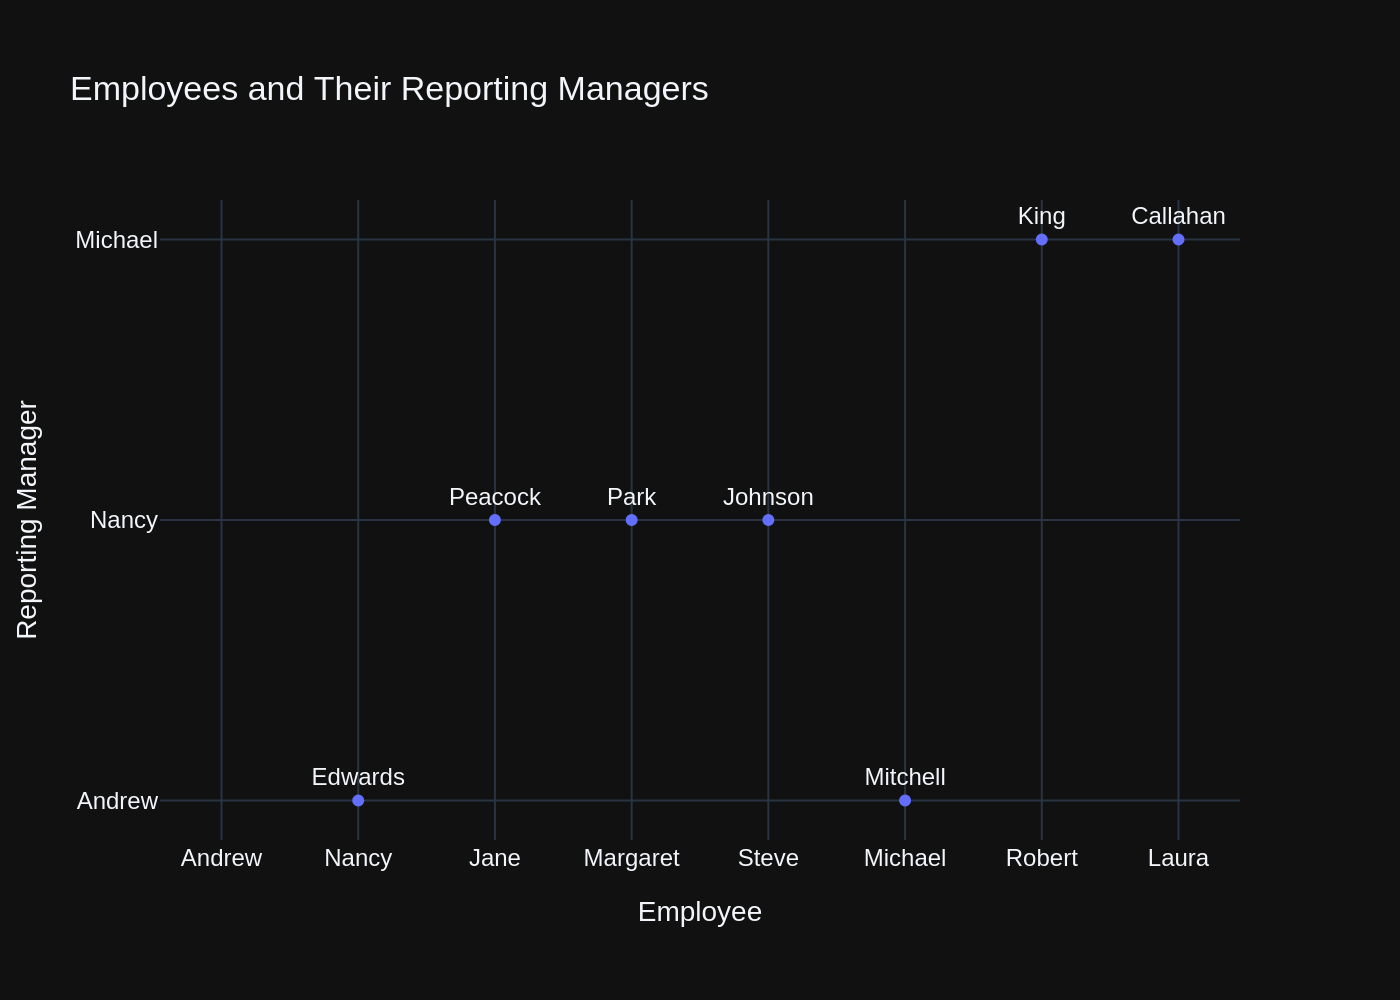

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 13:   Get the average invoice total for each customer:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_

SELECT c.CustomerId, c.FirstName, c.LastName, AVG(i.Total) AS AverageInvoiceTotal 
FROM customers c 
LEFT JOIN invoices i ON c.CustomerId = i.CustomerId 
GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY AverageInvoiceTotal DESC


[( DATA )]
queried data frame


,CustomerId,FirstName,LastName,AverageInvoiceTotal
0,6,Helena,Holý,7.088571
1,26,Richard,Cunningham,6.802857
2,57,Luis,Rojas,6.660000
3,45,Ladislav,Kovács,6.517143
4,46,Hugh,O'Reilly,6.517143
5,24,Frank,Ralston,6.231429
6,28,Julia,Barnett,6.231429
7,37,Fynn,Zimmermann,6.231429
8,59,Puja,Srivastava,6.106667
9,7,Astrid,Gruber,6.088571



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: ' Get the average invoice total for each customer:'\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, AVG(i.Total) AS AverageInvoiceTotal \nFROM customers c \nLEFT JOIN invoices i ON c.CustomerId = i.CustomerId \nGROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY AverageInvoiceTotal DESC\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId               int64\nFirstName               object\nLastName                object\nAverageInvoiceTotal    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there 

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['AverageInvoiceTotal'].iloc[0],
        title="Average Invoice Total for the Single Customer",
        color_continuous_scale=["darkblue"]
    )
else:
    fig = px.bar(
        df, 
        x='FirstName', 
        y='AverageInvoiceTotal', 
        title="Average Invoice Total per Customer",
        labels={'FirstName': 'Customer Name'}
    )

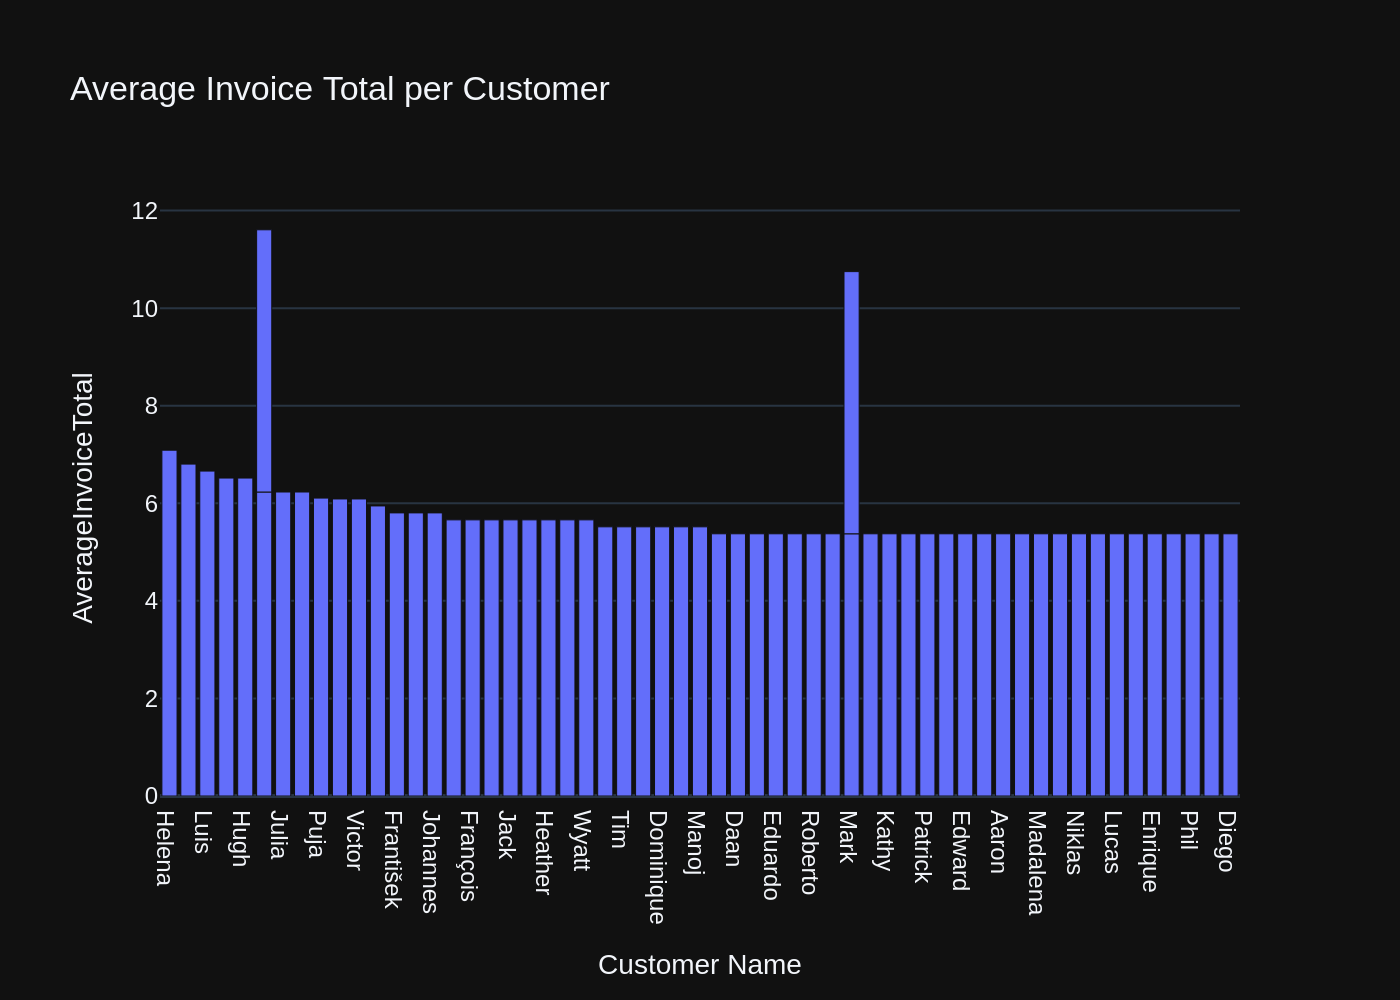

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 14:  Find the top 5 most expensive tracks (based on unit price):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACT

SELECT Name, UnitPrice FROM tracks ORDER BY UnitPrice DESC LIMIT 5


[( DATA )]
queried data frame


,Name,UnitPrice
0,Battlestar Galactica: The Story So Far,1.99
1,Occupation / Precipice,1.99
2,"Exodus, Pt. 1",1.99
3,"Exodus, Pt. 2",1.99
4,Collaborators,1.99



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the top 5 most expensive tracks (based on unit price):'\n\nThe DataFrame was produced using this query: SELECT Name, UnitPrice FROM tracks ORDER BY UnitPrice DESC LIMIT 5\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Name          object\nUnitPrice    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created_at': '2024-10-12T18:17:25.789737137Z', 'mes

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(value=df['UnitPrice'].iloc[0], title='Top Expensive Track')
else:
    fig = px.bar(df, x='Name', y='UnitPrice', title='Top 5 Most Expensive Tracks')

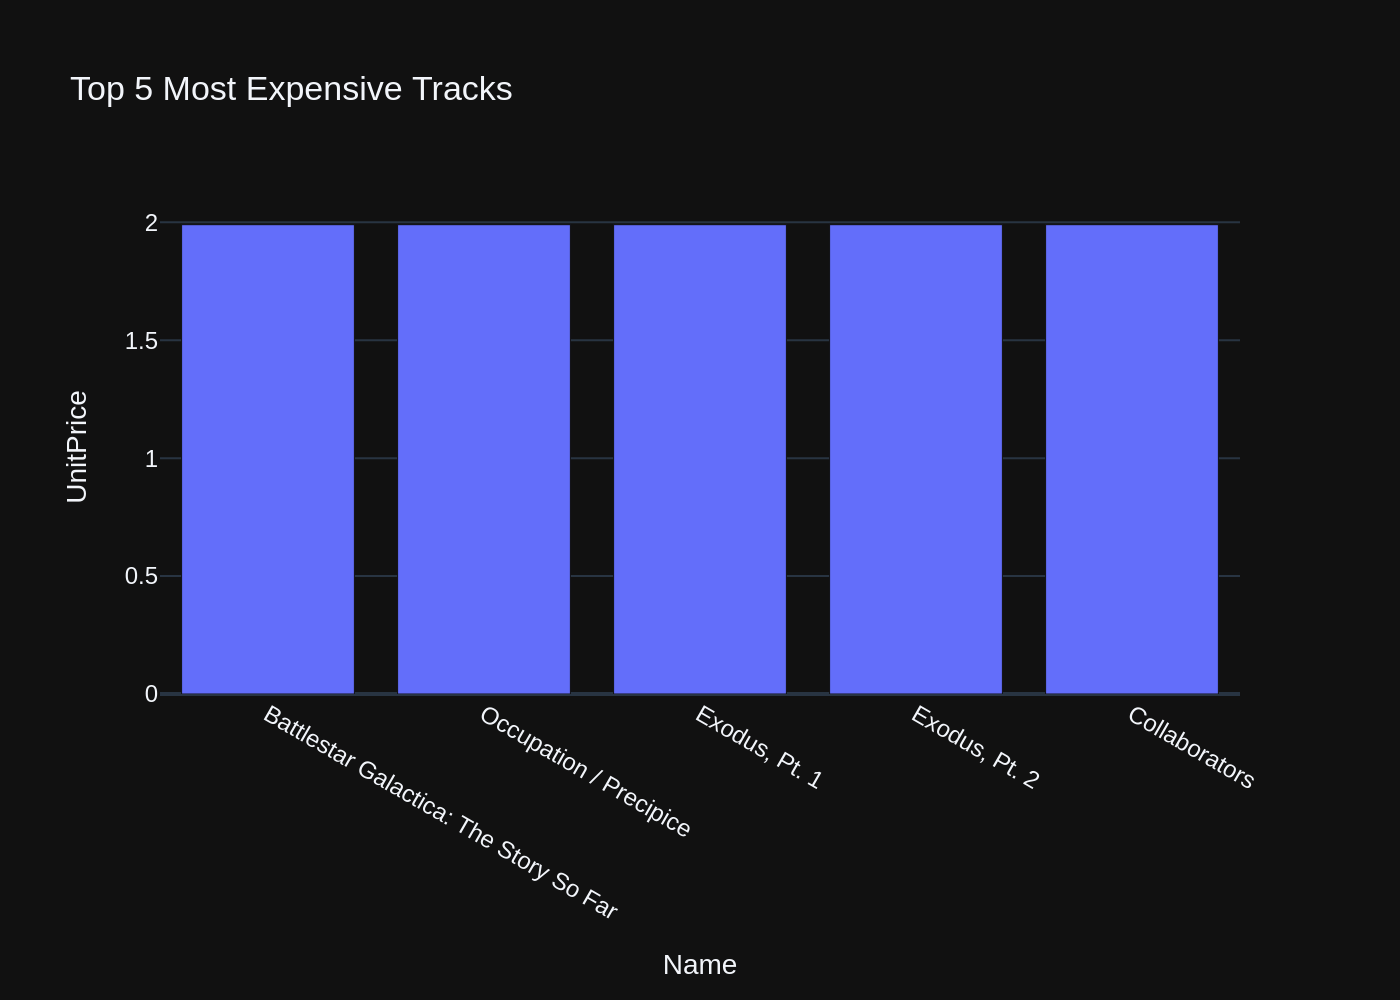

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 15:  List all genres and the number of tracks in each genre:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION 

SELECT g.Name, COUNT(t.TrackId) AS TrackCount 
FROM genres g 
LEFT JOIN tracks t ON g.GenreId = t.GenreId 
GROUP BY g.GenreId, g.Name ORDER BY TrackCount DESC


[( DATA )]
queried data frame


,Name,TrackCount
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all genres and the number of tracks in each genre:'\n\nThe DataFrame was produced using this query: SELECT g.Name, COUNT(t.TrackId) AS TrackCount \nFROM genres g \nLEFT JOIN tracks t ON g.GenreId = t.GenreId \nGROUP BY g.GenreId, g.Name ORDER BY TrackCount DESC\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Name          object\nTrackCount     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama R

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df.iloc[0]['TrackCount'],
        title=f"Total Tracks in Genre: {df.iloc[0]['Name']}"
    )
else:
    fig = px.bar(df, x='Name', y='TrackCount', title="Number of Tracks per Genre")

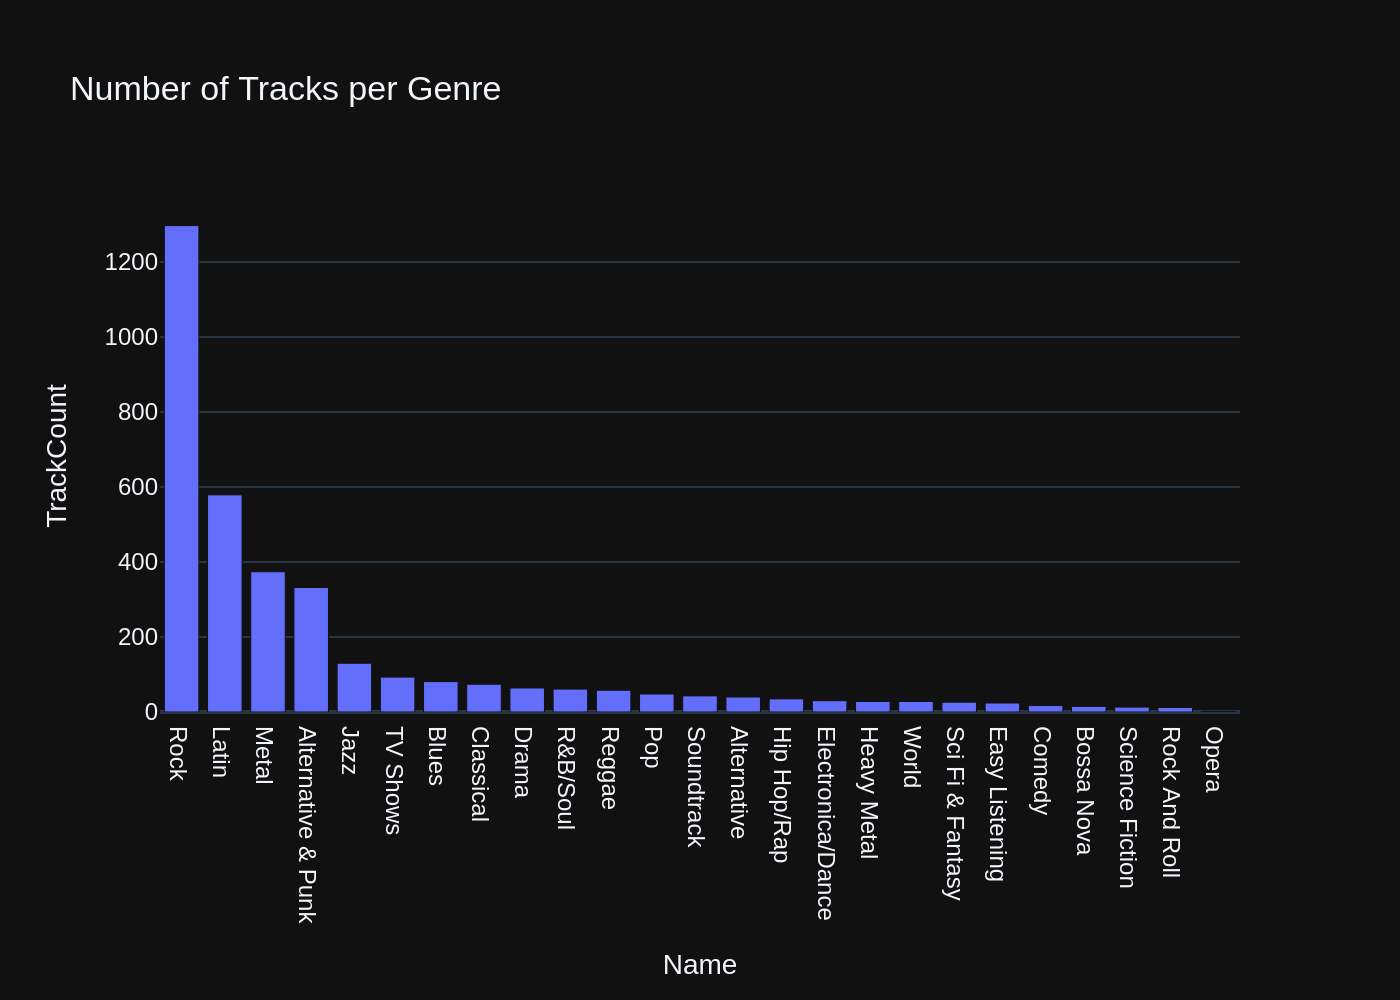

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 16:  Get all genres that do not have any tracks associated with them:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REF

SELECT g.Name 
FROM genres g 
LEFT JOIN tracks t ON g.GenreId = t.GenreId 
WHERE t.TrackId IS NULL


[( DATA )]
queried data frame


,Name


Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 17:  List all customers who have not placed any orders:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(

SELECT CustomerId, FirstName, LastName 
FROM customers 
WHERE CustomerId NOT IN (SELECT CustomerId FROM invoices)


[( DATA )]
queried data frame


,CustomerId,FirstName,LastName


Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FORE

SELECT a.Name, COUNT(t.TrackId) AS TrackCount 
FROM artists a 
JOIN albums al ON a.ArtistId = al.ArtistId 
JOIN tracks t ON al.AlbumId = t.AlbumId 
GROUP BY a.ArtistId, a.Name 
ORDER BY TrackCount DESC 
LIMIT 10


[( DATA )]
queried data frame


,Name,TrackCount
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Deep Purple,92
5,Lost,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: ' \n        Can you find the top 10 most popular artists based on the number of tracks?\n        Hint: There are 3 tables - artists, albums and tracks, \n        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,\n    '\n\nThe DataFrame was produced using this query: SELECT a.Name, COUNT(t.TrackId) AS TrackCount \nFROM artists a \nJOIN albums al ON a.ArtistId = al.ArtistId \nJOIN tracks t ON al.AlbumId = t.AlbumId \nGROUP BY a.ArtistId, a.Name \nORDER BY TrackCount DESC \nLIMIT 10\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Name          object\nTrackCount     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['TrackCount'].values[0],
        title=f"Top Artist by Track Count: {df['Name'].iloc[0]}"
    )
else:
    fig = px.bar(df, x='Name', y='TrackCount')

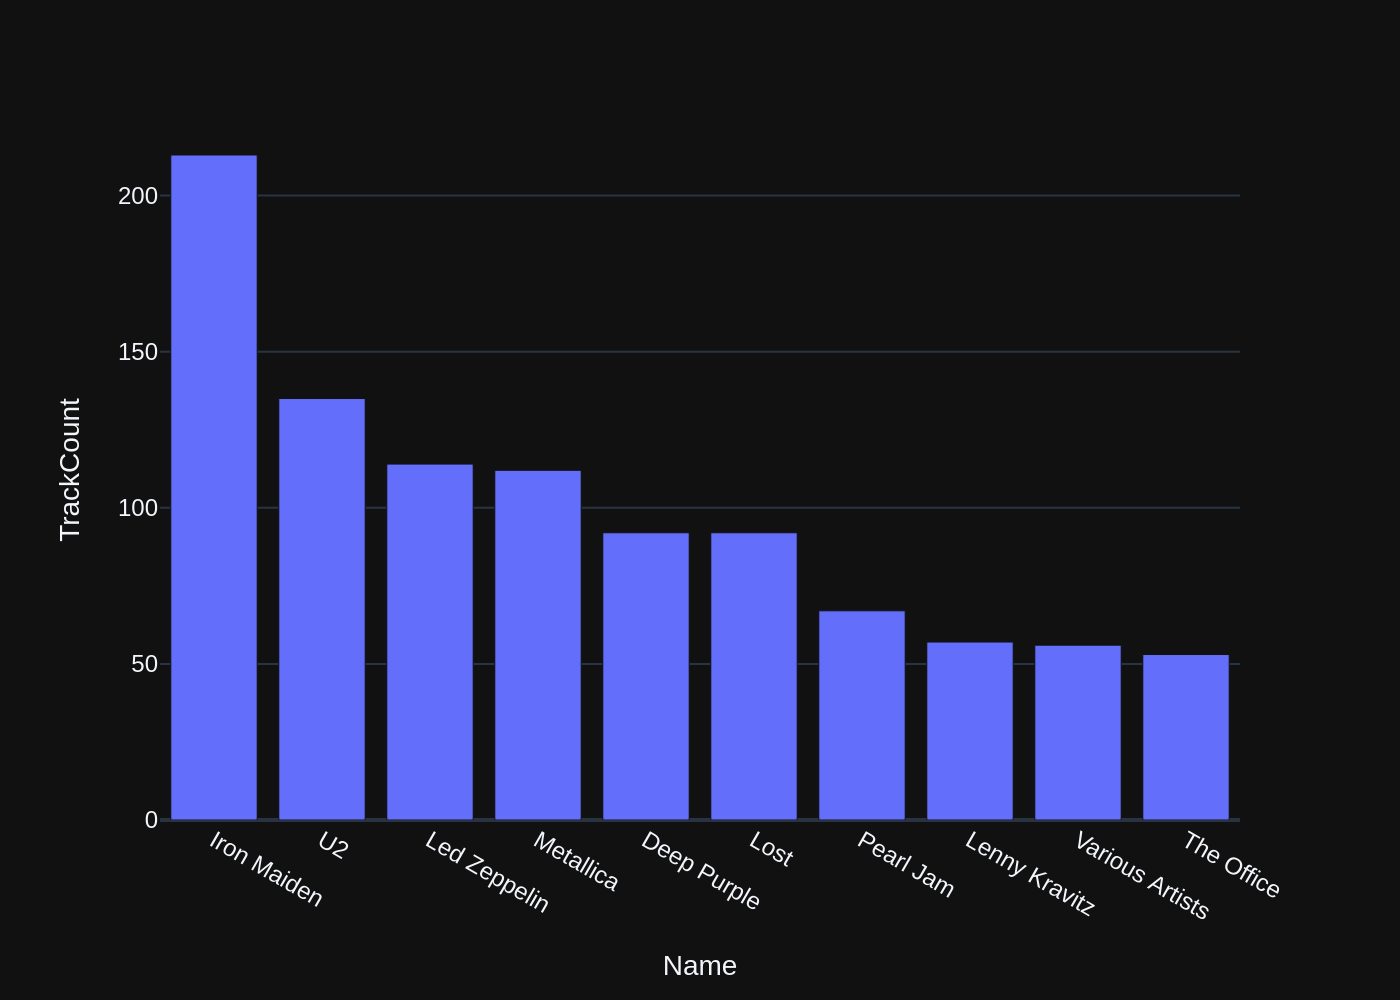

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 19:  List all customers from Canada and their email addresses:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60)  NOT NULL,\r\n    SupportRepId INTEGER,\r\n    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\

SELECT FirstName, LastName, Email FROM customers WHERE Country = 'Canada'


[( DATA )]
queried data frame


,FirstName,LastName,Email
0,François,Tremblay,ftremblay@gmail.com
1,Mark,Philips,mphilips12@shaw.ca
2,Jennifer,Peterson,jenniferp@rogers.ca
3,Robert,Brown,robbrown@shaw.ca
4,Edward,Francis,edfrancis@yachoo.ca
5,Martha,Silk,marthasilk@gmail.com
6,Aaron,Mitchell,aaronmitchell@yahoo.ca
7,Ellie,Sullivan,ellie.sullivan@shaw.ca



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all customers from Canada and their email addresses:'\n\nThe DataFrame was produced using this query: SELECT FirstName, LastName, Email FROM customers WHERE Country = 'Canada'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n FirstName    object\nLastName     object\nEmail        object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:latest', 'created_at': '2024-10-12T18

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['Email'].values[0],
        title="Customer Information",
        color_discrete_map={'#636EFA'}
    )
else:
    fig = px.scatter(
        df, 
        x=df['FirstName'], 
        y=df['LastName'], 
        hover_data=['Email'],
        title="Customers from Canada"
    )

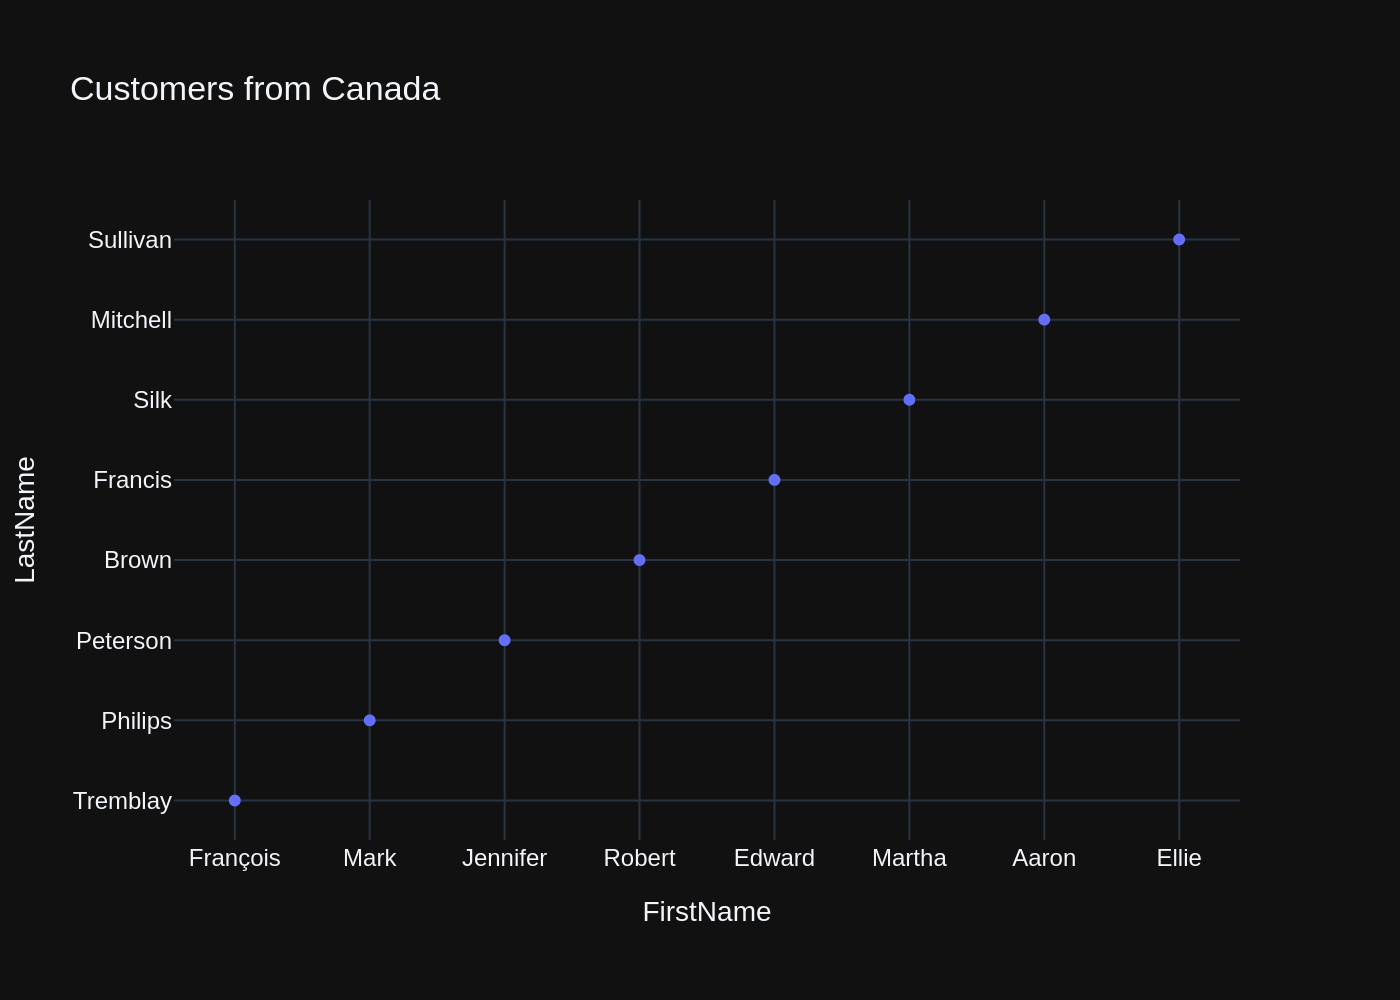

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 20:  Find the customer with the most invoices 


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r

SELECT c.CustomerId, c.FirstName, c.LastName 
FROM customers c 
LEFT JOIN invoices i ON c.CustomerId = i.CustomerId 
GROUP BY c.CustomerId, c.FirstName, c.LastName 
ORDER BY COUNT(i.InvoiceId) DESC LIMIT 1


[( DATA )]
queried data frame


,CustomerId,FirstName,LastName
0,1,Luís,Gonçalves



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the customer with the most invoices '\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName \nFROM customers c \nLEFT JOIN invoices i ON c.CustomerId = i.CustomerId \nGROUP BY c.CustomerId, c.FirstName, c.LastName \nORDER BY COUNT(i.InvoiceId) DESC LIMIT 1\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId     int64\nFirstName     object\nLastName      object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer

import plotly.express as px

fig = px.indicator(
    if df.shape[0] == 1,
    title="Customer with the Most Invoices",
    value=df['CustomerId'].values[0],
    mode="number",
    color_discrete_map={"indicator": "steelblue"}
)

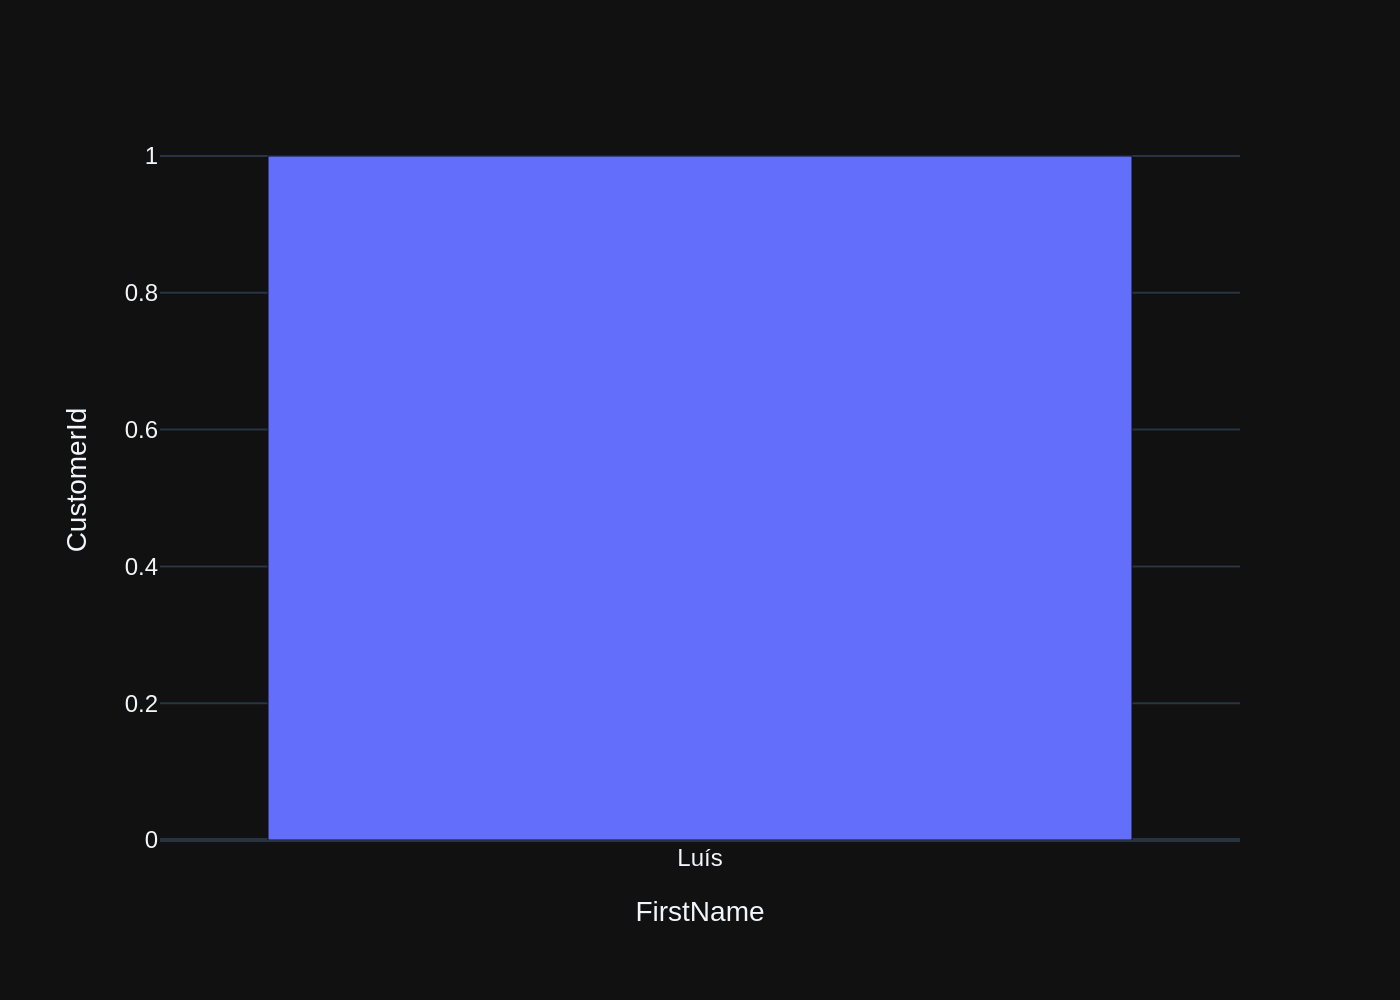

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 21:  Find the customer who bought the most albums in total quantity (across all invoices):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalQuantity 
FROM customers c 
JOIN invoice_items ii ON c.CustomerId = ii.InvoiceId 
GROUP BY c.CustomerId, c.FirstName, c.LastName 
ORDER BY TotalQuantity DESC LIMIT 1


[( DATA )]
queried data frame


,CustomerId,FirstName,LastName,TotalQuantity
0,5,František,Wichterlová,14



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the customer who bought the most albums in total quantity (across all invoices):'\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalQuantity \nFROM customers c \nJOIN invoice_items ii ON c.CustomerId = ii.InvoiceId \nGROUP BY c.CustomerId, c.FirstName, c.LastName \nORDER BY TotalQuantity DESC LIMIT 1\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId        int64\nFirstName        object\nLastName         object\nTotalQuantity     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'

import plotly.express as px

fig = px.indicator(
    if df.empty:
        title="No Data to Display",
    else:
        value=df['TotalQuantity'].iloc[0],
        title=f"Total Quantity of Albums Bought: {df['TotalQuantity'].iloc[0]}",
        domain={'x': [0, 1], 'y': [0, 1]},
        color_discrete_map={"indicator": "steelblue"}
)

fig.update_layout(
    title="Customer with Most Albums Bought"
)

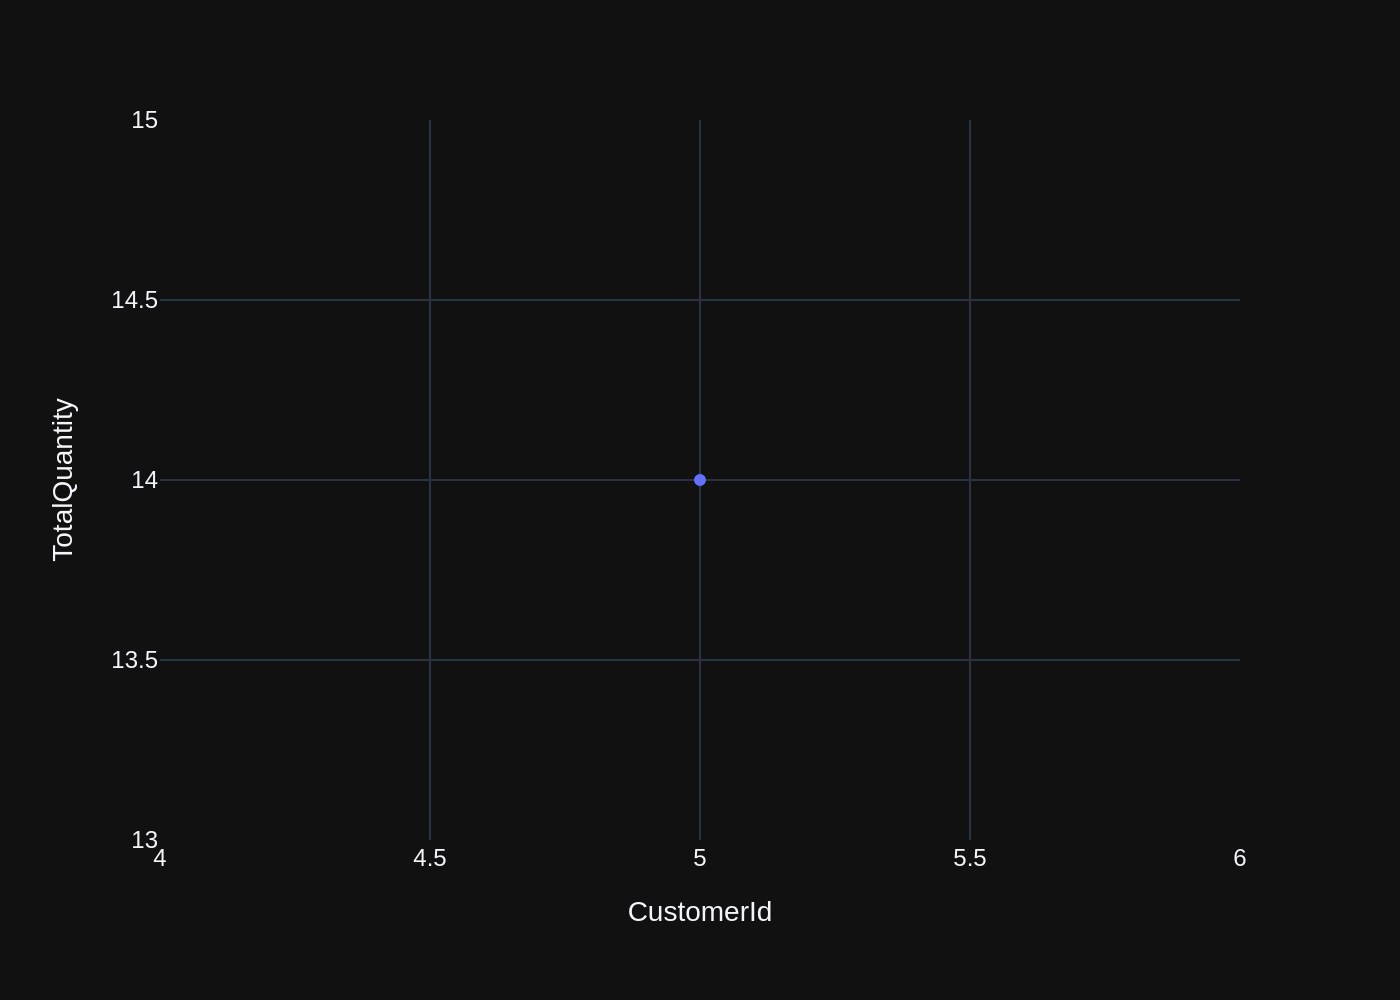

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCR

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalQuantity 
FROM customers c 
JOIN invoice_items ii ON c.CustomerId = ii.InvoiceId 
GROUP BY c.CustomerId, c.FirstName, c.LastName 
ORDER BY TotalQuantity DESC LIMIT 5


[( DATA )]
queried data frame


,CustomerId,FirstName,LastName,TotalQuantity
0,5,František,Wichterlová,14
1,12,Roberto,Almeida,14
2,19,Tim,Goyer,14
3,26,Richard,Cunningham,14
4,33,Ellie,Sullivan,14



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '      \n        Find the top 5 customers who bought the most albums in total quantity (across all invoices):\n        Hint: album quantity is found in invoice_items, \n    '\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalQuantity \nFROM customers c \nJOIN invoice_items ii ON c.CustomerId = ii.InvoiceId \nGROUP BY c.CustomerId, c.FirstName, c.LastName \nORDER BY TotalQuantity DESC LIMIT 5\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId        int64\nFirstName        object\nLastName         object\nTotalQuantity     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to c

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['TotalQuantity'].values[0],
        title=f"Top Customer Total Quantity: {df['FirstName'].values[0]} {df['LastName'].values[0]}"
    )
else:
    fig = px.bar(df, x='FirstName', y='TotalQuantity', text='TotalQuantity')
    fig.update_traces(textposition='auto')
    fig.update_layout(title="Top 5 Customers by Total Quantity")

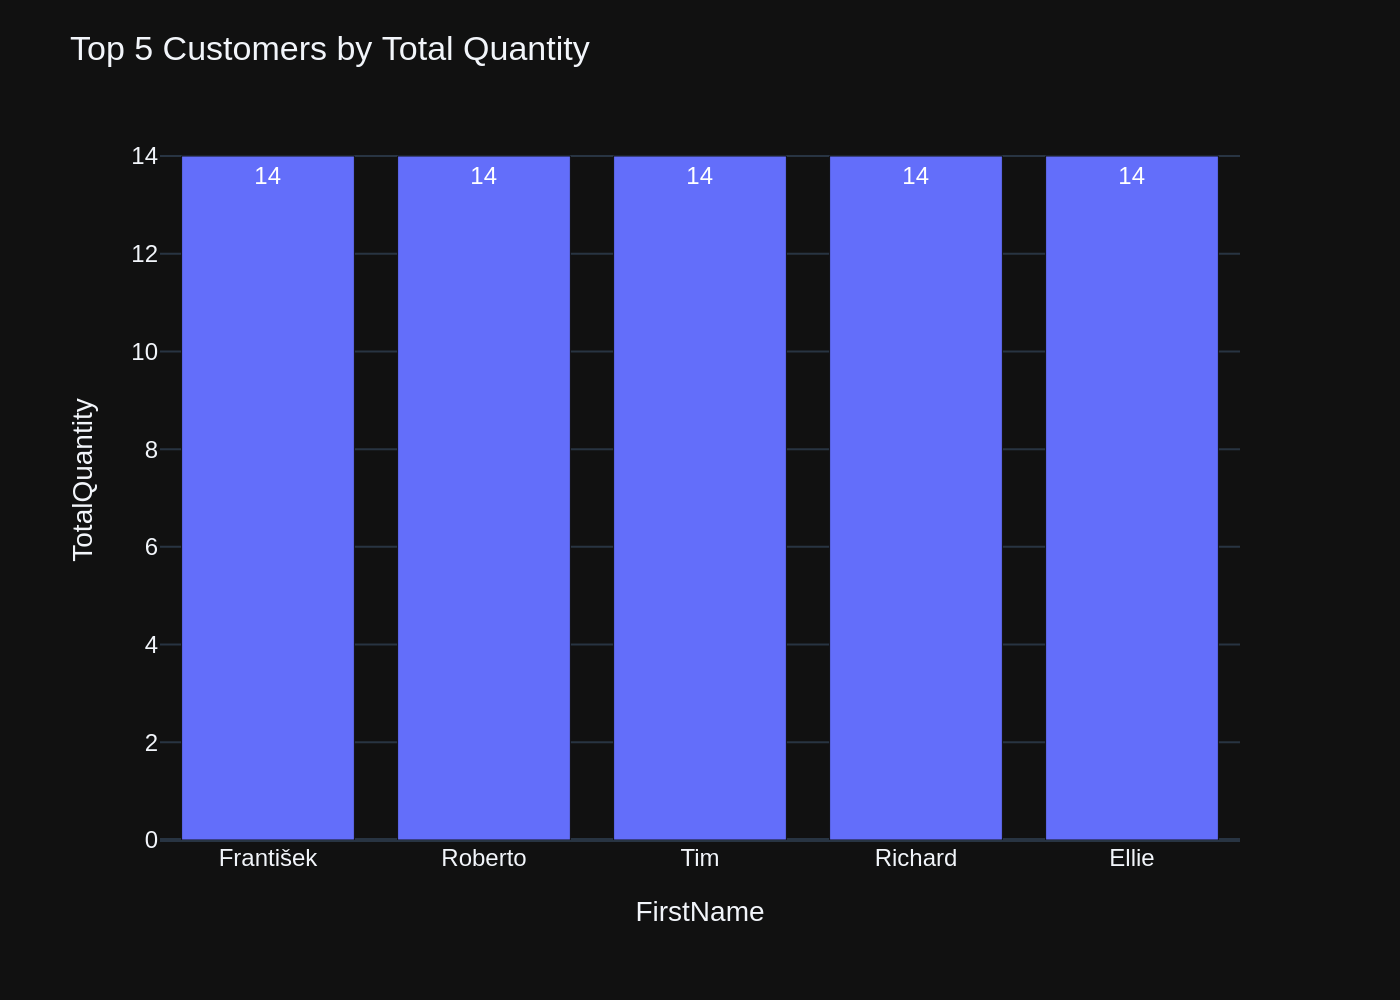

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABL

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(i.Total) AS TotalSpent 
FROM customers c 
JOIN invoices i ON c.CustomerId = i.CustomerId 
GROUP BY c.CustomerId, c.FirstName, c.LastName 
ORDER BY TotalSpent DESC LIMIT 5


[( DATA )]
queried data frame


,CustomerId,FirstName,LastName,TotalSpent
0,6,Helena,Holý,49.62
1,26,Richard,Cunningham,47.62
2,57,Luis,Rojas,46.62
3,45,Ladislav,Kovács,45.62
4,46,Hugh,O'Reilly,45.62



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '  \n         Find the top 5 customers who spent the most money overall,  \n         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary \n    '\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, SUM(i.Total) AS TotalSpent \nFROM customers c \nJOIN invoices i ON c.CustomerId = i.CustomerId \nGROUP BY c.CustomerId, c.FirstName, c.LastName \nORDER BY TotalSpent DESC LIMIT 5\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId      int64\nFirstName      object\nLastName       object\nTotalSpent    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code 

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['TotalSpent'].values[0],
        title='Top Customer Spending'
    )
else:
    fig = px.bar(
        df,
        x='FirstName',
        y='TotalSpent',
        hover_data=['LastName'],
        title='Top 5 Customers by Spending'
    )

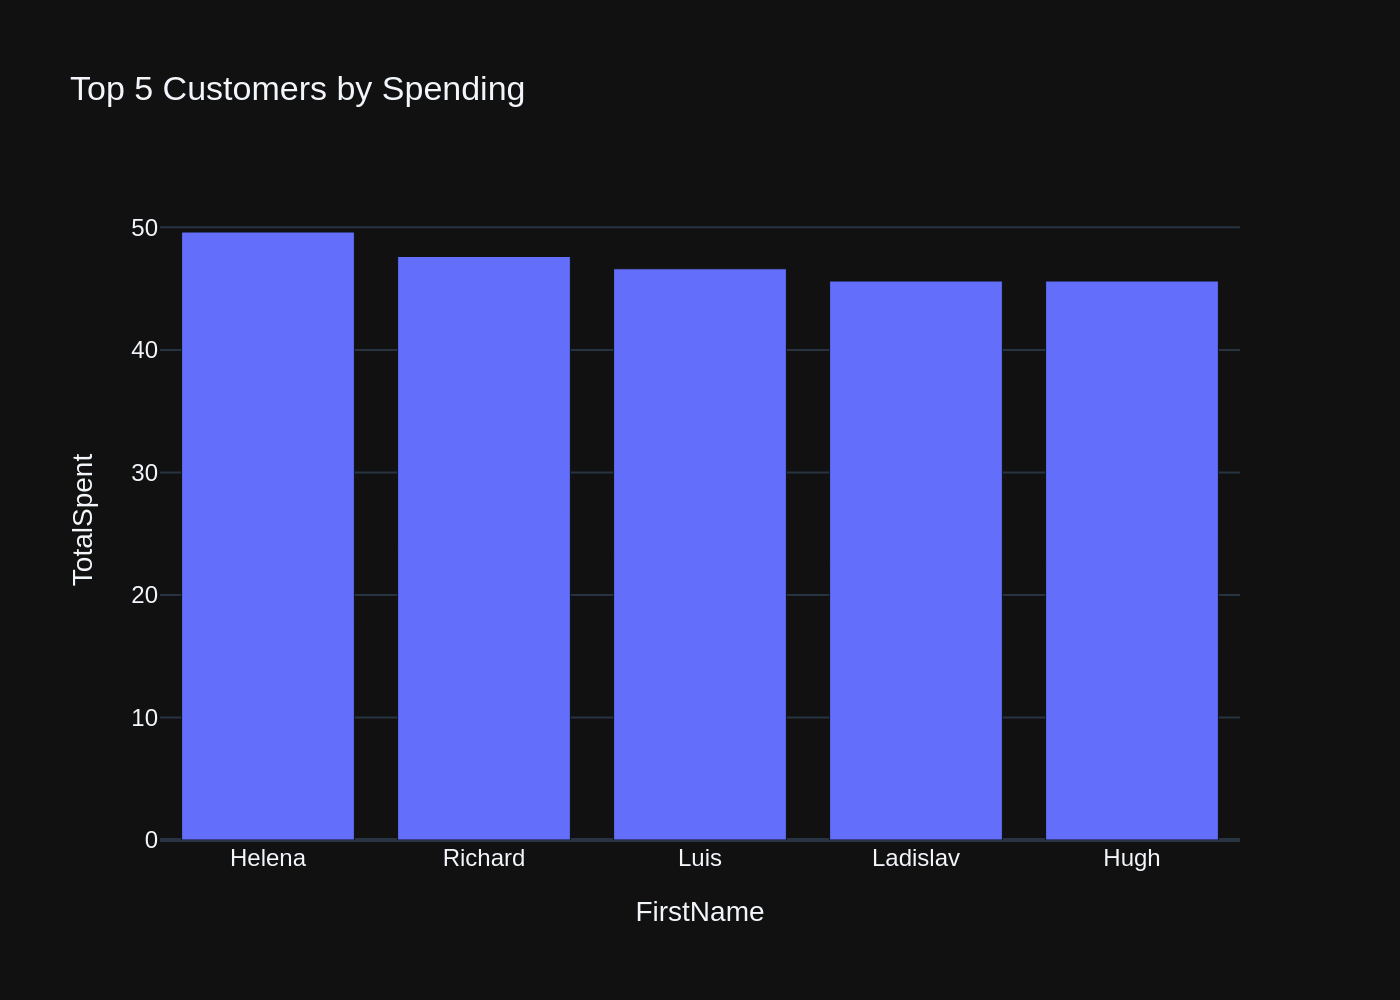

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "playlist_track"\r\n(\r\n    PlaylistId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    CONSTRAINT PK_PlaylistTrack PRIMARY KEY  (PlaylistId, TrackId),\r\n    FOREIGN KEY (PlaylistId) REFERENCES "playlists" (PlaylistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"

SELECT p.Name AS PlaylistName, SUM(tMilliseconds) AS TotalDuration 
FROM playlist_track pt 
JOIN playlists p ON p.PlaylistId = pt.PlaylistId 
JOIN tracks t ON t.TrackId = pt.TrackId 
GROUP BY p.PlaylistId, p.Name 
HAVING COUNT(pt.TrackId) >= 10

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "playlist_track"\r\n(\r\n    PlaylistId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    CONSTRAINT PK_PlaylistTrack PRIMARY KEY  (PlaylistId, TrackId),\r\n    FOREIGN KEY (PlaylistId) REFERENCES "playlists" (PlaylistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,

SELECT p.Name AS PlaylistName, SUM(t.Milliseconds) AS TotalDuration 
FROM playlist_track pt 
JOIN playlists p ON p.PlaylistId = pt.PlaylistId 
JOIN tracks t ON t.TrackId = pt.TrackId 
GROUP BY p.PlaylistId, p.Name 
HAVING COUNT(pt.TrackId) >= 10


[( DATA )]
queried data frame


,PlaylistName,TotalDuration
0,Music,877683083
1,TV Shows,501094957
2,90’s Music,398705153
3,Music,877683083
4,TV Shows,501094957
5,Brazilian Music,9486559
6,Classical,21770592
7,Classical 101 - Deep Cuts,6755730
8,Classical 101 - Next Steps,7575051
9,Classical 101 - The Basics,7439811



[Ollama parameters]
model=qwen2.5:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '\n        For the question Get all playlists containing at least 10 tracks and the total duration of those tracks:, \n        the generated SQL statement SELECT p.Name AS PlaylistName, SUM(tMilliseconds) AS TotalDuration \nFROM playlist_track pt \nJOIN playlists p ON p.PlaylistId = pt.PlaylistId \nJOIN tracks t ON t.TrackId = pt.TrackId \nGROUP BY p.PlaylistId, p.Name \nHAVING COUNT(pt.TrackId) >= 10 results in the following exception [ERROR-DB] Failed to execute SQL: SELECT p.Name AS PlaylistName, SUM(tMilliseconds) AS TotalDuration \nFROM playlist_track pt \nJOIN playlists p ON p.PlaylistId = pt.PlaylistId \nJOIN tracks t ON t.TrackId = pt.TrackId \nGROUP BY p.PlaylistId, p.Name \nHAVING COUNT(pt.TrackId) >= 10\n Execution failed on sql 'SELECT 

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['TotalDuration'].values[0],
        title=f"Total Duration of Tracks in Playlist: {df['PlaylistName'].values[0]}"
    )
else:
    fig = px.bar(df, x='PlaylistName', y='TotalDuration', title="Total Duration of Tracks per Playlist")

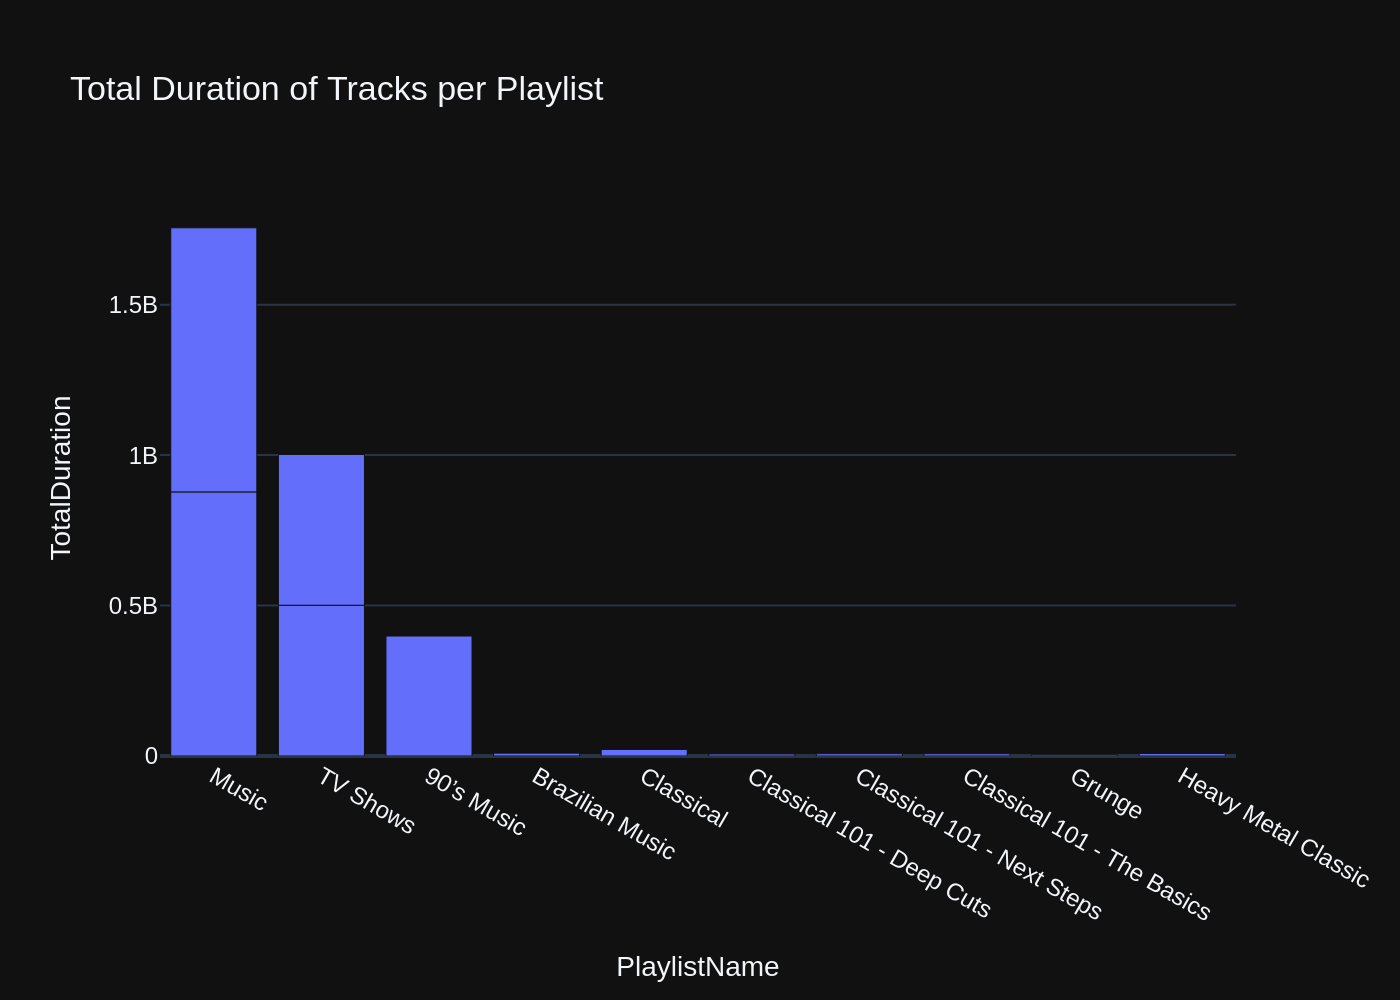

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 25:  Identify artists who have albums with tracks appearing in multiple genres:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tO

SELECT DISTINCT a.Name 
FROM artists a 
JOIN albums al ON a.ArtistId = al.ArtistId 
JOIN tracks t ON al.AlbumId = t.AlbumId 
JOIN (
    SELECT GenreId, TrackId 
    FROM tracks 
    GROUP BY GenreId, TrackId 
    HAVING COUNT(DISTINCT GenreId) > 1
) gt ON t.TrackId = gt.TrackId 
GROUP BY a.ArtistId, a.Name


[( DATA )]
queried data frame


,Name


In [15]:
for n, question in enumerate(questions):
    # if n != 4: continue
    
    # if n > 5: continue
        
    my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

### Check completion time

In [16]:
ts_stop = time()
elapsed_time = ts_stop - ts_start
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'qwen2.5' 
 took 2388 sec
 run on 'ducklover1' 
 at 20241012-143834


In [17]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-qwen2.5-2388s-ducklover1-20241012-143834.csv'

### Save training data

In [18]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,0bd2172c-51f6-5c02-82b4-12406f8b1337-sql,\n For the question Get all playlists c...,"SELECT p.Name AS PlaylistName, SUM(t.Milliseco...",sql
1,0c0e62e0-007d-5c4c-80be-7211493a0867-sql,"Find all tracks with a name containing ""What"" ...",SELECT Name FROM tracks WHERE LOWER(Name) LIKE...,sql
2,169d2960-d7e4-5591-96a5-9a0aeb184182-sql,List all employees and their reporting manager...,"SELECT e1.FirstName, e1.LastName, e2.FirstName...",sql
3,3573cc12-226d-594d-b18e-59b7a60974e9-sql,Find the top 5 most expensive tracks (based on...,"SELECT Name, UnitPrice FROM tracks ORDER BY Un...",sql
4,36afa966-46b5-5542-932c-f48e49d47d80-sql,Find all invoices since 2010 and the total amo...,"SELECT InvoiceDate, Total FROM invoices WHERE ...",sql
5,402510e1-d33d-5a70-bb88-2f7ce9cbd1d8-sql,Get the total number of invoices for each cust...,"SELECT c.CustomerId, c.FirstName, c.LastName, ...",sql
6,41f71e9e-4d28-5737-9fdb-0f51b59cf434-sql,Can you list all tables in the SQLite database...,SELECT name FROM sqlite_master WHERE type='tab...,sql
7,54594b94-c673-5abd-94bb-df5267e3f040-sql,which table stores customer's orders,SELECT name FROM sqlite_master WHERE type='tab...,sql
8,6864f5cf-44ee-53b4-aaa3-2ebe2aee3f38-sql,Find the total number of invoices per country,"SELECT BillingCountry, COUNT(*) AS InvoiceCoun...",sql
9,9661e9a6-5c76-5d83-a760-4d6e3c71db1c-sql,\n Find the top 5 customers who spen...,"SELECT c.CustomerId, c.FirstName, c.LastName, ...",sql


In [19]:
df_training_data.to_csv(file_csv, index=False)